In [5]:
from google.colab import files

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

Funciones de visualizacion

In [9]:
def  plot_dis(y_test,y_pred,etiqueta=""):
#istplot
    plt.figure()
    ax1 = sns.distplot(y_test, hist=True, color="r", label="y")
    sns.distplot(y_pred, hist=True, color="b", label="y_pred" , ax=ax1)
    plt.legend()

    plt.title(f'y_{etiqueta} VS y_pred_{etiqueta}')
    plt.xlabel('purchased_last_month')

    plt.show()
    plt.close()

In [10]:
ruta="/content/drive/MyDrive/A Automatico -cursada/TP1 Aprendizaje Automatico/TP1/Data/data_clean.csv"
df = pd.read_csv(ruta)

<Axes: >

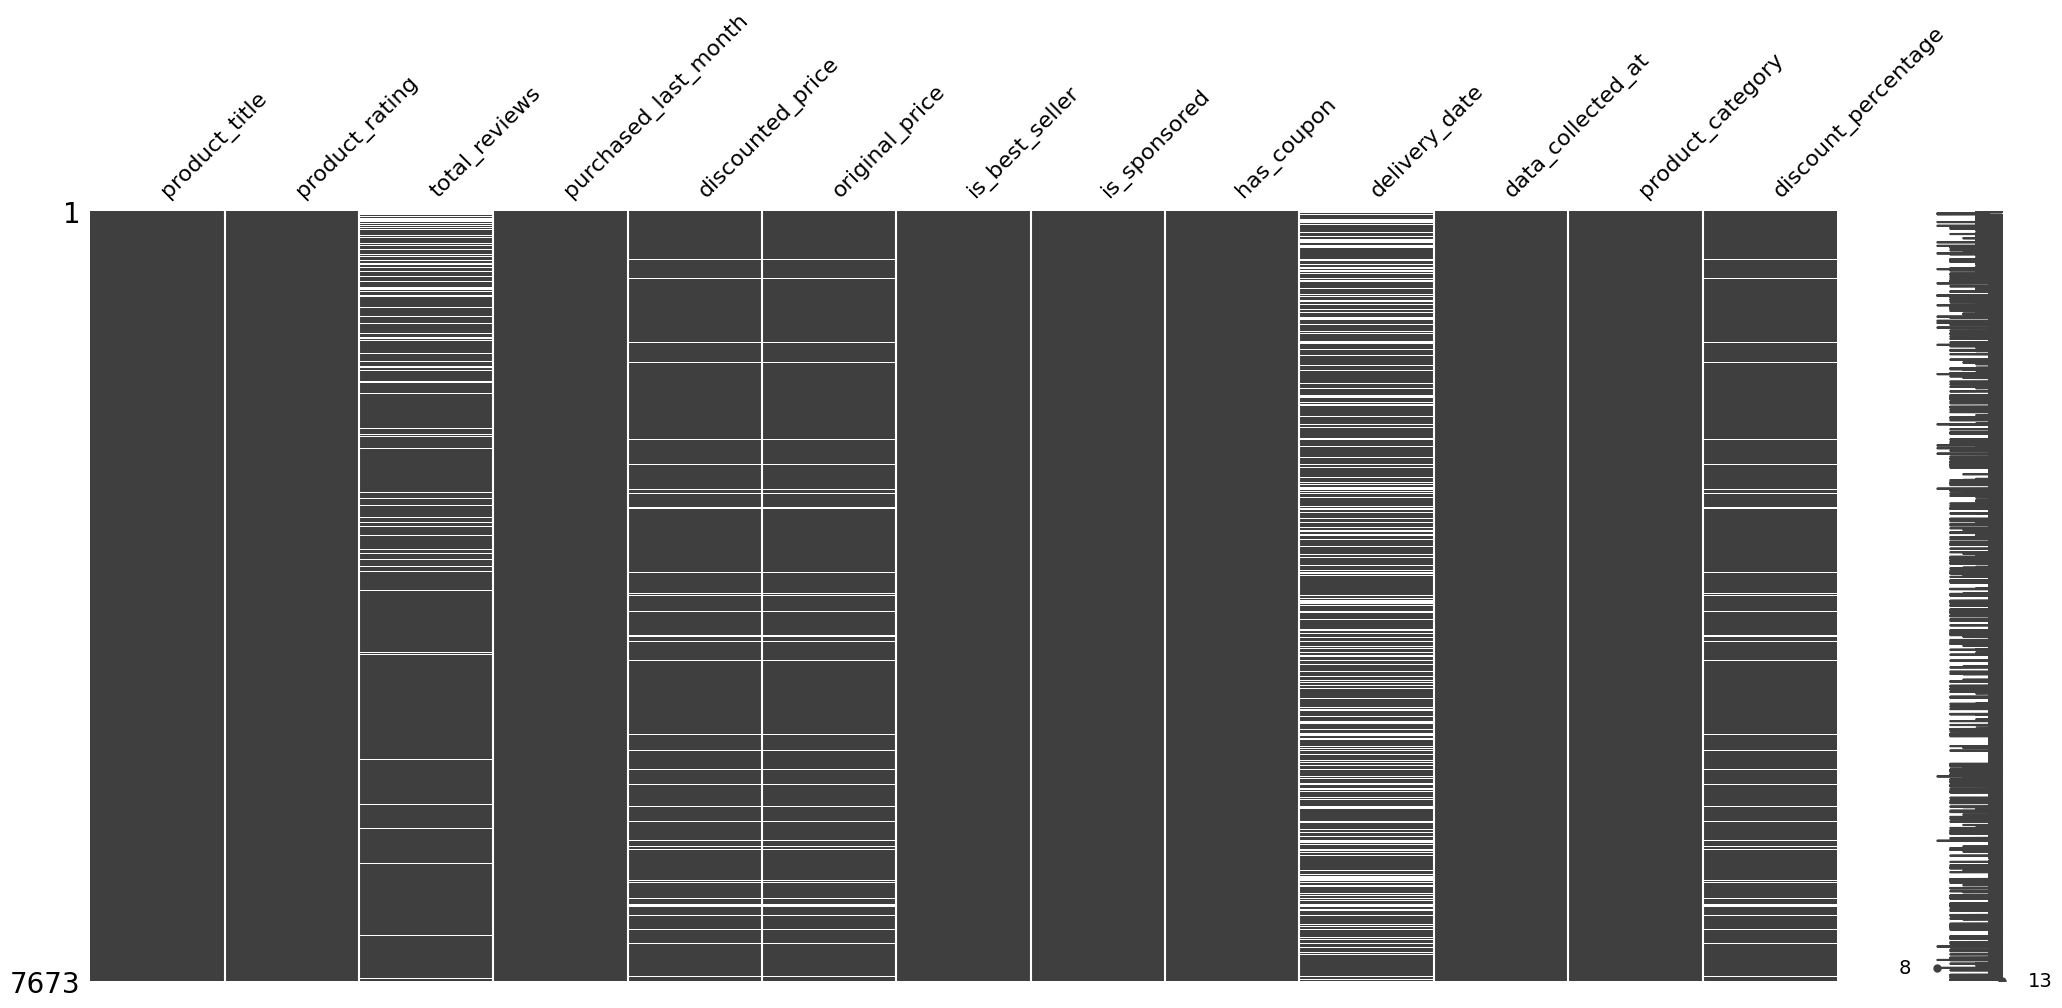

In [12]:
import missingno as msno
msno.matrix(df)

### Calculo de rank_review

In [13]:
def set_category_ranking(x):
    if x < 4.4:
        return "low"
    elif x < 4.6:
        return "mid"
    else:
        return "high"

In [14]:
#df = df.drop_duplicates(subset="product_title")
#df = df[(df["product_rating"].notna()) & (df["purchased_last_month"].notna())] # ambas columanas tendran datos

df["rank_review"] = df["product_rating"].apply(set_category_ranking) # aplicar la funcion
df["partition"] = df["product_title"].apply(lambda x: len(x) % 10) #en la columna particion poner el resto de 10
df["is_test_set"] = df["partition"]>6
df["is_test_set"].value_counts(normalize=True)

is_test_set
False    0.677571
True     0.322429
Name: proportion, dtype: float64

In [15]:
df_train = df[~df["is_test_set"]]
df_test = df[df["is_test_set"]]

In [16]:
df["rank_review"].value_counts(normalize=True)

rank_review
high    0.442721
low     0.293236
mid     0.264043
Name: proportion, dtype: float64

In [17]:
df_train["rank_review"].value_counts(normalize=True)

rank_review
high    0.451818
low     0.290825
mid     0.257357
Name: proportion, dtype: float64

In [18]:
df_test["rank_review"].value_counts(normalize=True)

rank_review
high    0.423605
low     0.298302
mid     0.278092
Name: proportion, dtype: float64

<Axes: ylabel='Frequency'>

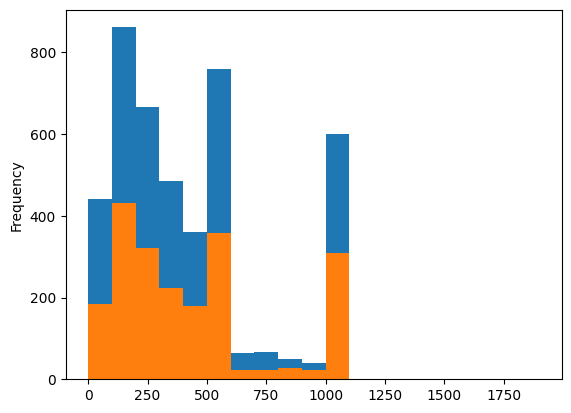

In [19]:
df_train["purchased_last_month"].plot.hist(bins = range(0, 2000, 100))
df_test["purchased_last_month"].plot.hist(bins = range(0, 2000, 100))

Eliminamos las columnas que usamos para particionar entre test y train

In [20]:
df_train = df_train.drop(columns=["partition", "is_test_set","product_rating"])
df_test = df_test.drop(columns=["partition", "is_test_set","product_rating"])

In [21]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

<Axes: >

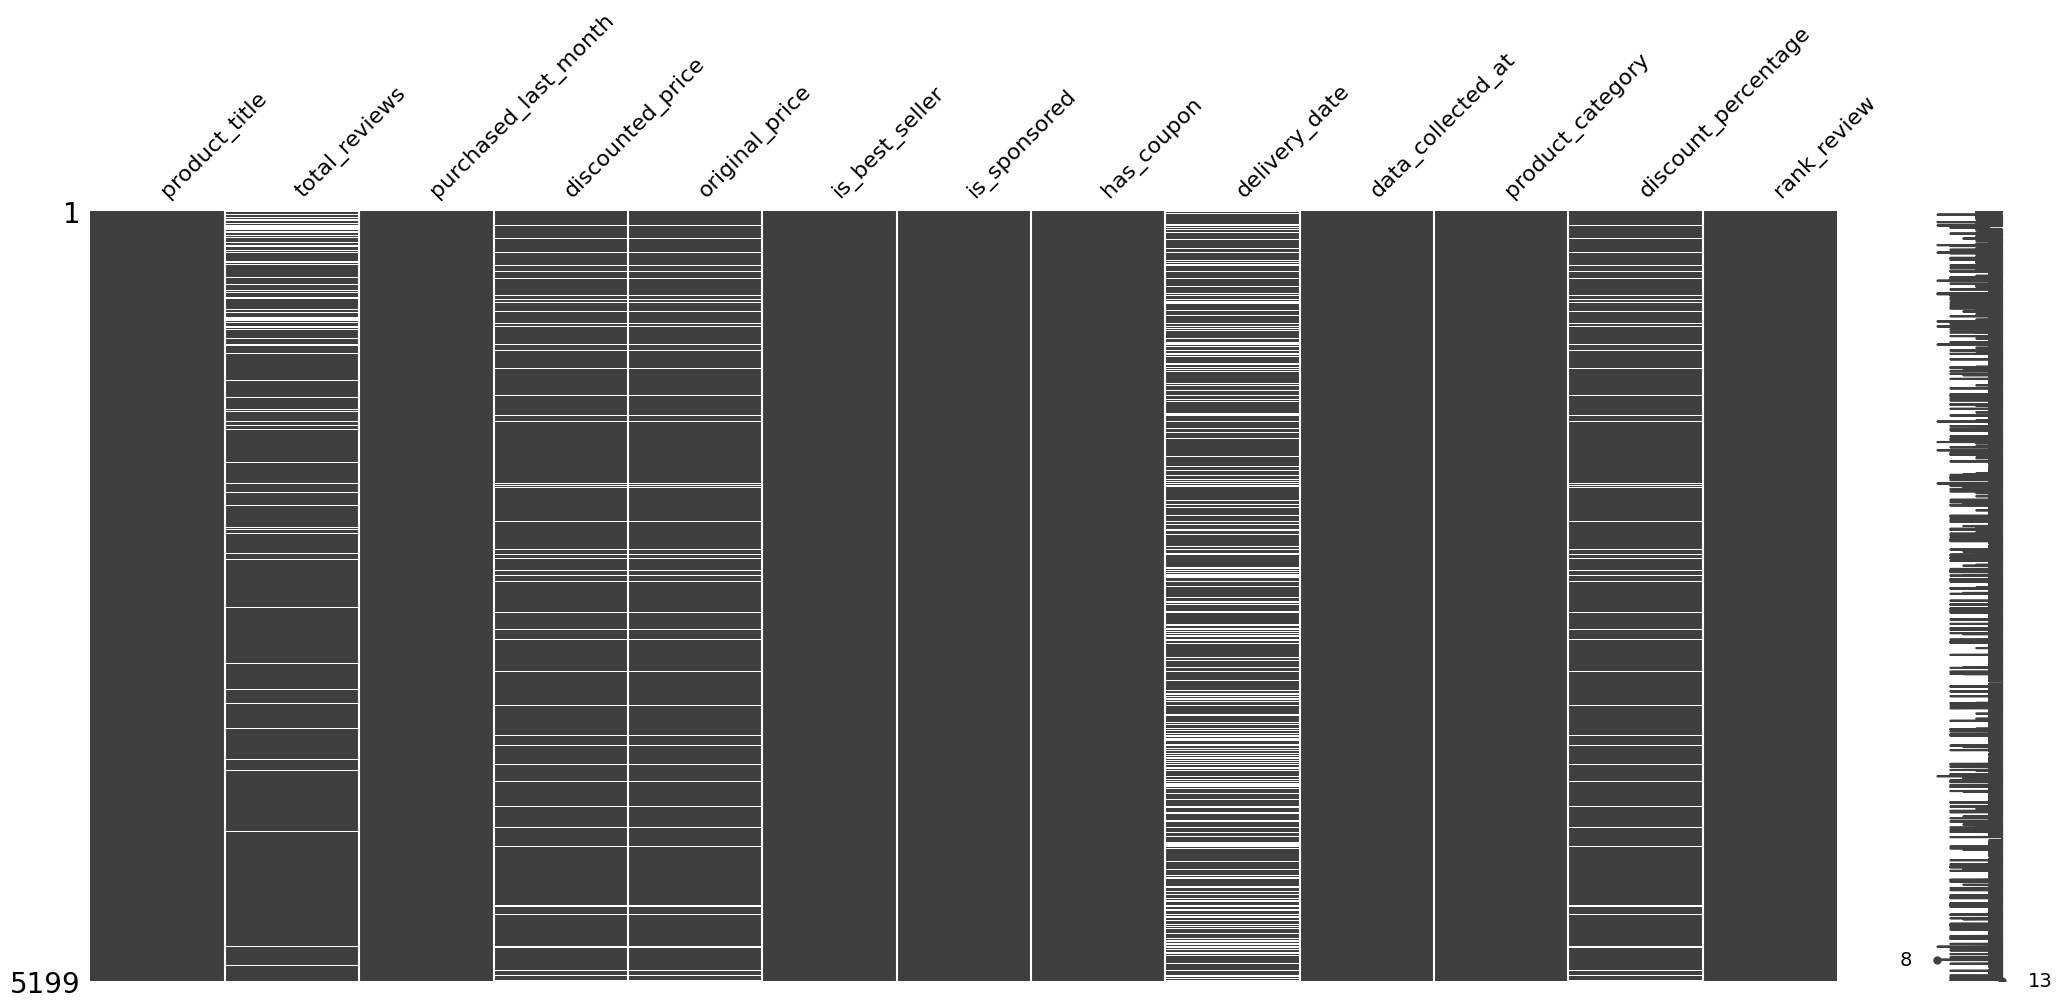

In [22]:
import missingno as msno
msno.matrix(df_train)

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199 entries, 0 to 5198
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         5199 non-null   object 
 1   total_reviews         4708 non-null   float64
 2   purchased_last_month  5199 non-null   float64
 3   discounted_price      4921 non-null   float64
 4   original_price        4921 non-null   float64
 5   is_best_seller        5199 non-null   object 
 6   is_sponsored          5199 non-null   object 
 7   has_coupon            5199 non-null   object 
 8   delivery_date         3773 non-null   object 
 9   data_collected_at     5199 non-null   object 
 10  product_category      5199 non-null   object 
 11  discount_percentage   4921 non-null   float64
 12  rank_review           5199 non-null   object 
dtypes: float64(5), object(8)
memory usage: 528.2+ KB


# EDA Numerico


## Tratamiento de outliers

In [24]:
df_train.describe(include=[np.number]).round(2)

total_reviews  purchased_last_month  discounted_price  original_price  \
count        4708.00               5199.00           4921.00         4921.00   
mean         2126.43               1379.55            181.66          193.16   
std          3018.34               4981.77            324.48          338.52   
min             1.00                 50.00              2.16            2.16   
25%           201.00                100.00             28.54           30.41   
50%           799.50                400.00             79.99           89.00   
75%          2656.00               1000.00            198.99          209.99   
max         14971.00             100000.00           4198.00         4299.00   

       discount_percentage  
count              4921.00  
mean                  7.35  
std                  12.34  
min                   0.00  
25%                   0.00  
50%                   0.00  
75%                  12.22  
max                  82.56

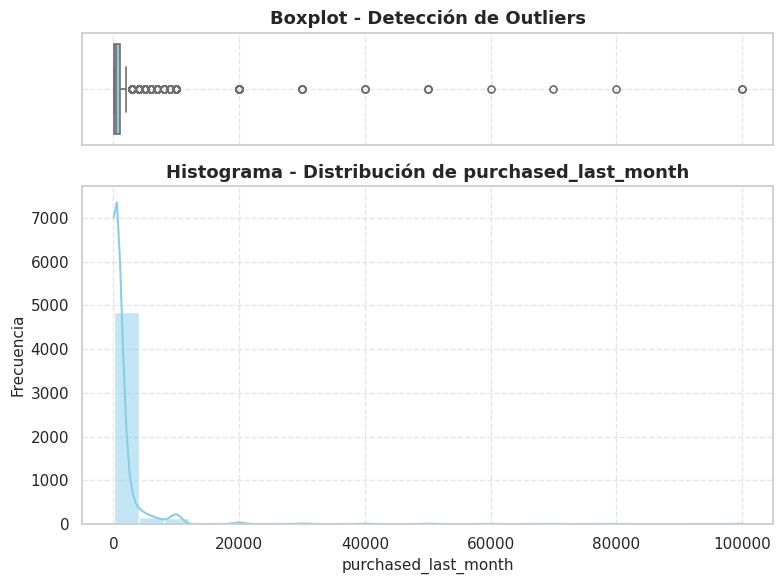

In [25]:
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

# Crear figura y subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [1, 3]})

# --- Boxplot (arriba) ---
sns.boxplot(x=df_train['purchased_last_month'], ax=axs[0], color='skyblue', fliersize=5, linewidth=1.2)
axs[0].set_title('Boxplot - Detección de Outliers', fontsize=13, fontweight='bold')
axs[0].set_xlabel('')
axs[0].grid(True, linestyle='--', alpha=0.5)

# --- Histograma (abajo) ---
sns.histplot(df_train['purchased_last_month'], bins=25, kde=True, ax=axs[1], color='skyblue')
axs[1].set_title('Histograma - Distribución de purchased_last_month', fontsize=13, fontweight='bold')
axs[1].set_xlabel('purchased_last_month', fontsize=11)
axs[1].set_ylabel('Frecuencia', fontsize=11)
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

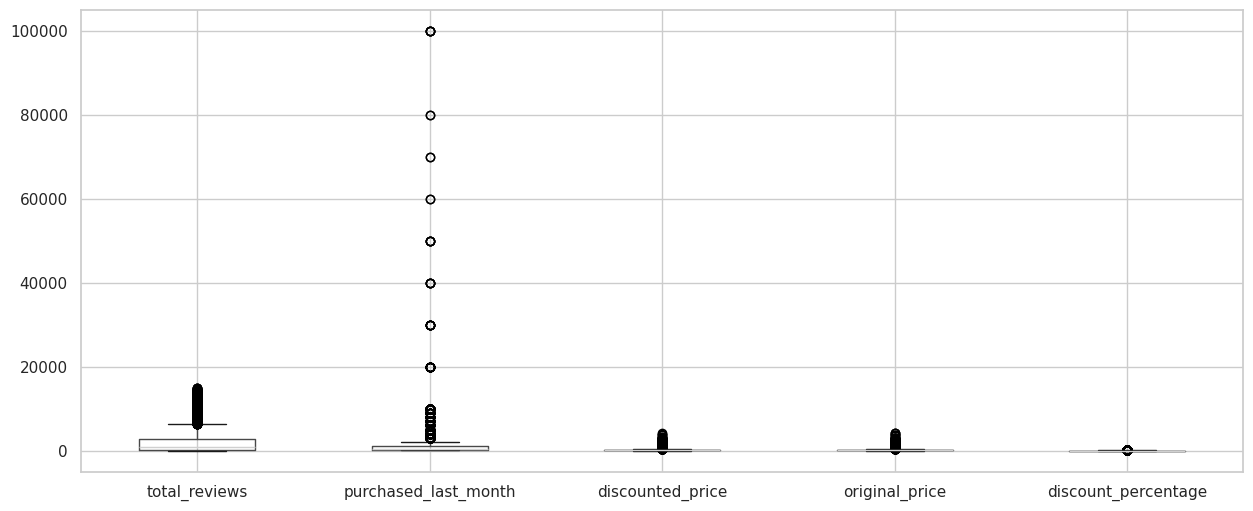

In [26]:
import matplotlib.pyplot as plt
numeric_cols = list(df_train.select_dtypes(include='number').columns)

df_train.boxplot(column=numeric_cols, figsize=(15,6))
plt.show()

In [27]:
float_columns=df_train.select_dtypes(include='number').columns
float_columns

Index(['total_reviews', 'purchased_last_month', 'discounted_price',
       'original_price', 'discount_percentage'],
      dtype='object')

In [28]:
# medimos asimetria con kew [0 = simetrica   0.5 :ligeramente sesgado     >1 muy sesgada]
skew_vals=df_train[float_columns].skew()
skew_vals

total_reviews            2.066614
purchased_last_month    12.597234
discounted_price         5.217421
original_price           5.241239
discount_percentage      1.868187
dtype: float64

In [29]:
from sklearn.preprocessing import PowerTransformer
#pt = PowerTransformer(method='yeo-johnson')  # Yeo-Johnson soporta ceros y negativos, y no solo posivos como el box-cox
skew_limit=0.75 #medicion aceptable

for col in float_columns:
    if abs(skew_vals[col]) > skew_limit:
        # Transformar la columna (reshape(-1,1) porque PowerTransformer espera 2D)
        df_train[col] =df_train[col].apply(np.log1p) # pt.fit_transform(df_train[[col]])

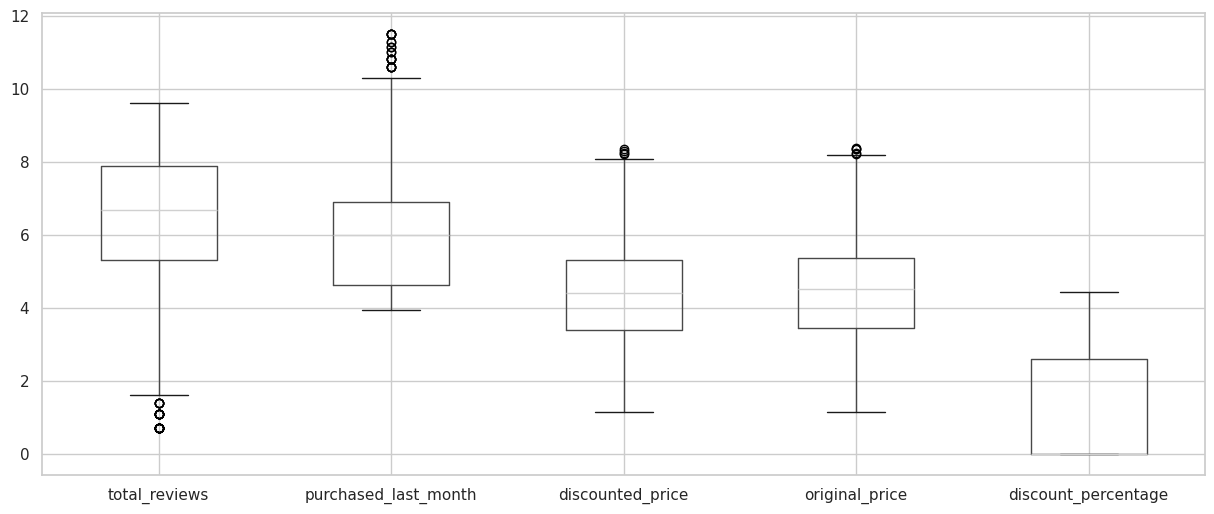

In [336]:
df_train.boxplot(column=numeric_cols, figsize=(15,6))
plt.show()

<Axes: >

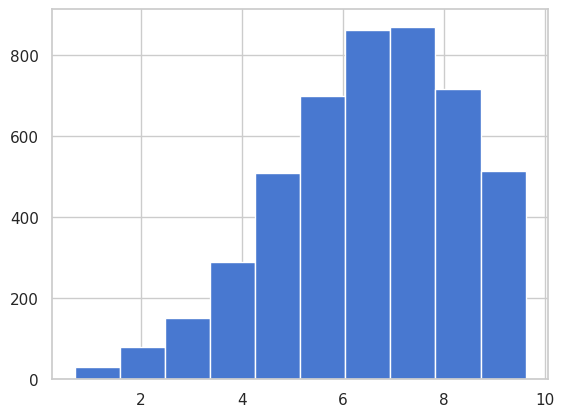

In [30]:
df_train['total_reviews'].hist()#.skew()

In [31]:
df_train.describe(include=[np.number]).round(2)

total_reviews  purchased_last_month  discounted_price  original_price  \
count        4708.00               5199.00           4921.00         4921.00   
mean            6.51                  6.01              4.38            4.47   
std             1.79                  1.36              1.28            1.26   
min             0.69                  3.93              1.15            1.15   
25%             5.31                  4.62              3.39            3.45   
50%             6.69                  5.99              4.39            4.50   
75%             7.88                  6.91              5.30            5.35   
max             9.61                 11.51              8.34            8.37   

       discount_percentage  
count              4921.00  
mean                  1.04  
std                   1.44  
min                   0.00  
25%                   0.00  
50%                   0.00  
75%                   2.58  
max                   4.43

## Tratamiento de valores Nulos

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199 entries, 0 to 5198
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         5199 non-null   object 
 1   total_reviews         4708 non-null   float64
 2   purchased_last_month  5199 non-null   float64
 3   discounted_price      4921 non-null   float64
 4   original_price        4921 non-null   float64
 5   is_best_seller        5199 non-null   object 
 6   is_sponsored          5199 non-null   object 
 7   has_coupon            5199 non-null   object 
 8   delivery_date         3773 non-null   object 
 9   data_collected_at     5199 non-null   object 
 10  product_category      5199 non-null   object 
 11  discount_percentage   4921 non-null   float64
 12  rank_review           5199 non-null   object 
dtypes: float64(5), object(8)
memory usage: 528.2+ KB


<Axes: >

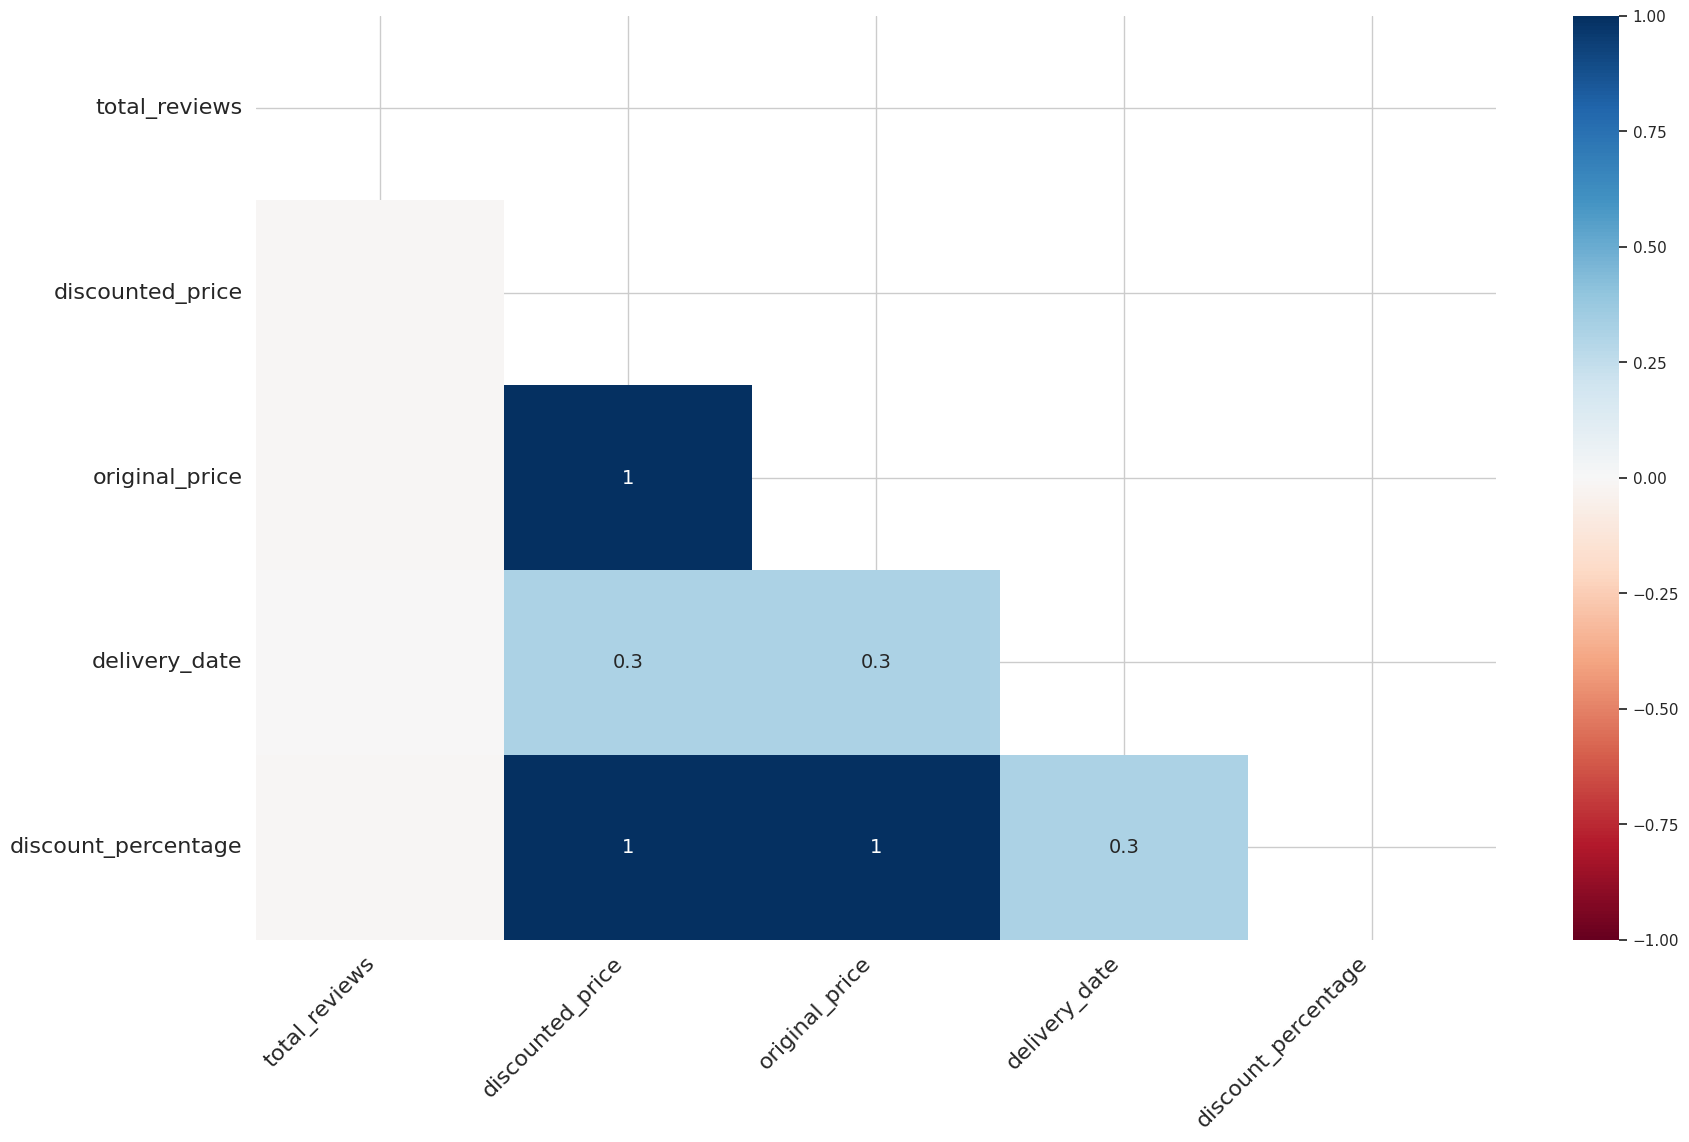

In [33]:
# correlaciones entre los valores faltantes.
# 0 -> los faltantes son independientes → puedes usar imputación simple.
# 1 -> realizaremos una imputacion co las columnas que esten corelacionadas por faltantes
msno.heatmap(df_train)

* "original_price", "discounted_price" y "discount_percentage" estan correlacionados por datos nulos

<Axes: >

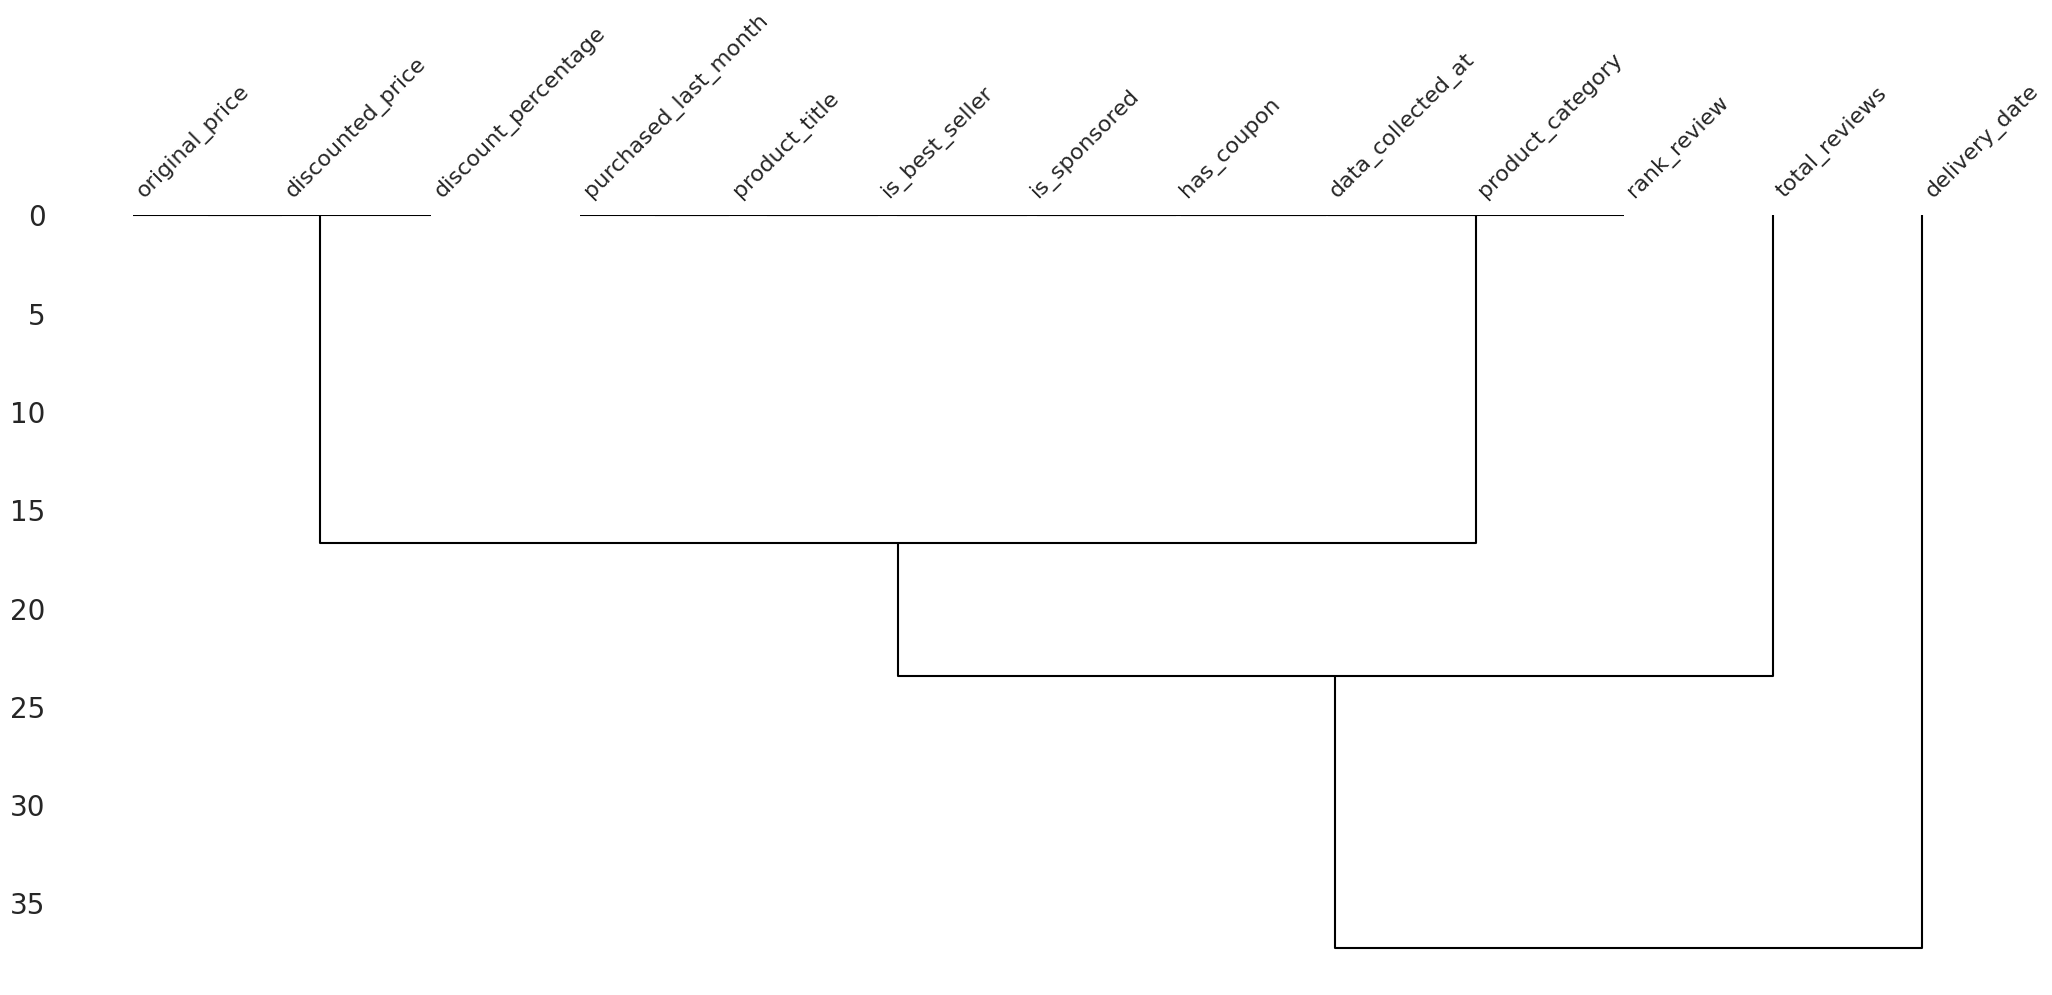

In [34]:
msno.dendrogram(df_train)

In [35]:
from sklearn.impute import SimpleImputer, KNNImputer

# Columnas numéricas simples
num_simple_cols = ['total_reviews']

# Columnas numéricas correlacionadas
num_corr_cols = ['original_price', 'discounted_price', 'discount_percentage']

# Columnas categóricas - fecha
cat_cols = [ 'delivery_date']

# --- Imputación simple para numéricas independientes ---
imputer_simple = SimpleImputer(strategy='median')
df_train[num_simple_cols] = imputer_simple.fit_transform(df_train[num_simple_cols])

# --- Imputación avanzada para numéricas correlacionadas (KNN) ---
imputer_knn = KNNImputer(n_neighbors=5)
df_train[num_corr_cols] = imputer_knn.fit_transform(df_train[num_corr_cols])

# --- Imputación para categóricas (modo) ---
imputer_cat = SimpleImputer(strategy='most_frequent')
df_train[cat_cols] = imputer_cat.fit_transform(df_train[cat_cols])

<Axes: >

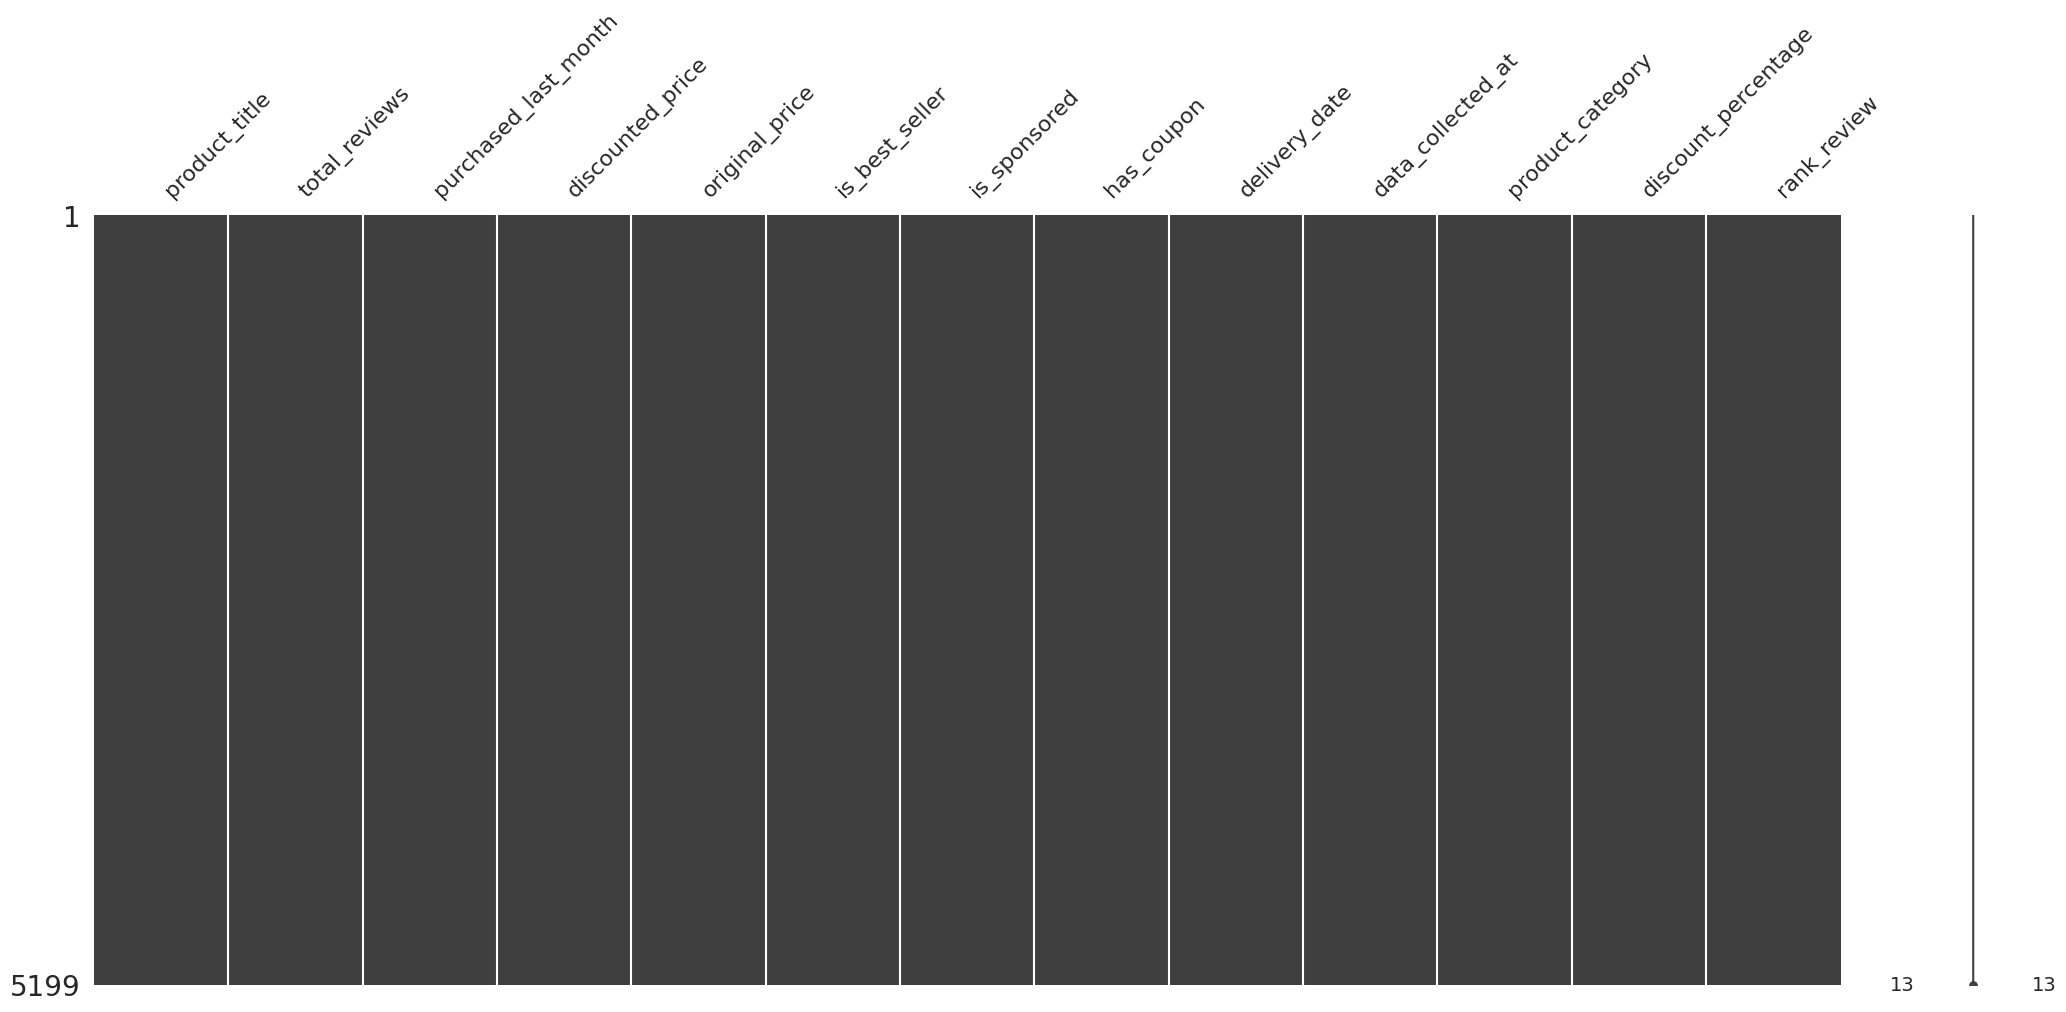

In [36]:
msno.matrix(df_train)

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199 entries, 0 to 5198
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         5199 non-null   object 
 1   total_reviews         5199 non-null   float64
 2   purchased_last_month  5199 non-null   float64
 3   discounted_price      5199 non-null   float64
 4   original_price        5199 non-null   float64
 5   is_best_seller        5199 non-null   object 
 6   is_sponsored          5199 non-null   object 
 7   has_coupon            5199 non-null   object 
 8   delivery_date         5199 non-null   object 
 9   data_collected_at     5199 non-null   object 
 10  product_category      5199 non-null   object 
 11  discount_percentage   5199 non-null   float64
 12  rank_review           5199 non-null   object 
dtypes: float64(5), object(8)
memory usage: 528.2+ KB


In [38]:
#chequeamos los valores unicos para hacer replace() y poder cambiar el tipo de datos si es que lo necesitara y habria dato por ejemplo caracteres en columna numerica
for col in df_train.columns:
  print(col)
  print(pd.unique(df_train[col]))

product_title
['lisen usb c to lightning cable, 240w 4 in 1 charging cable 6.6ft, chubby usb a/c to c/lightning with light for iphone 16e 15 14 pro/macbook air 17/ipad/samsung/switch 2, multi chargers for all devices'
 'dji mic 2 (2 tx + 1 rx + charging case), wireless lavalier microphone, intelligent noise cancelling, 32-bit float internal recording, 820 ft.(250m) range, microphone for iphone, android, camera'
 'apple airpods pro 2 wireless earbuds, active noise cancellation, hearing aid feature, bluetooth headphones, transparency, personalized spatial audio, high-fidelity sound, h2 chip, usb-c charging'
 ... 'energizer max aaa batteries (16 pack), triple a alkaline batteries'
 'audio-technica hp-ep replacement ear pads for m series headphones'
 'apple 2022 macbook air laptop with m2 chip (13.6-inch, 8gb ram, 256gb ssd storage) starlight (renewed)']
total_reviews
[7.80710329 8.02125618 6.68523634 ... 8.5754621  8.27842826 7.3714893 ]
purchased_last_month
[ 8.6996814   7.60140233  9.21

## Guardar datos -> storytelling

In [39]:
data_story=df_train.copy()

In [41]:
import numpy as np

for col in float_columns:
    if abs(skew_vals[col]) > skew_limit:
        data_story[col] = np.expm1(data_story[col])

In [53]:
data_story.describe(include=[np.number]).round(2)

total_reviews  purchased_last_month  discounted_price  original_price  \
count        5199.00               5199.00           5199.00         5199.00   
mean         2001.12               1379.55            176.17          187.44   
std          2898.35               4981.77            316.52          330.22   
min             1.00                 50.00              2.16            2.16   
25%           239.00                100.00             29.99           32.99   
50%           799.50                400.00             79.05           86.15   
75%          2365.50               1000.00            189.95          199.99   
max         14971.00             100000.00           4198.00         4299.00   

       discount_percentage  
count              5199.00  
mean                  7.05  
std                  12.07  
min                   0.00  
25%                   0.00  
50%                   0.00  
75%                  11.02  
max                  82.56

In [129]:
data_story.to_csv('/content/drive/MyDrive/A Automatico -cursada/TP1 Aprendizaje Automatico/TP1/Data/data_story.csv', index=False)

Codificamos la fecha

In [45]:
# df_train["delivery_date"] = pd.to_datetime(df_train["delivery_date"])
# df_train["delivery_date_num"] = df_train["delivery_date"].astype("int64")
#
# df_train_serie=df_train.copy()
df_train.drop('delivery_date', axis=1, inplace=True)
df_train.drop('data_collected_at', axis=1, inplace=True)

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199 entries, 0 to 5198
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         5199 non-null   object 
 1   total_reviews         5199 non-null   float64
 2   purchased_last_month  5199 non-null   float64
 3   discounted_price      5199 non-null   float64
 4   original_price        5199 non-null   float64
 5   is_best_seller        5199 non-null   object 
 6   is_sponsored          5199 non-null   object 
 7   has_coupon            5199 non-null   object 
 8   product_category      5199 non-null   object 
 9   discount_percentage   5199 non-null   float64
 10  rank_review           5199 non-null   object 
dtypes: float64(5), object(6)
memory usage: 446.9+ KB


##Reduccion de dimensionalidad

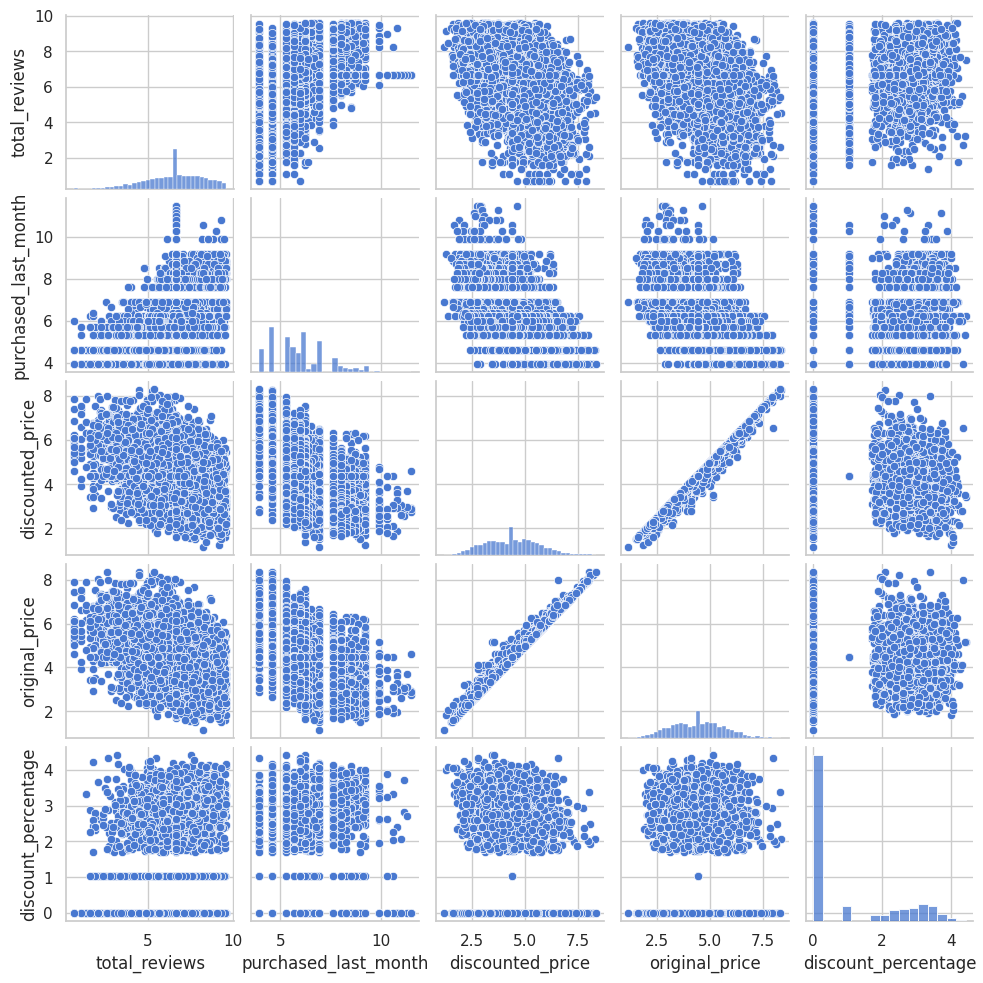

In [47]:
sns.pairplot(df_train, height=2)
plt.show()

<Axes: >

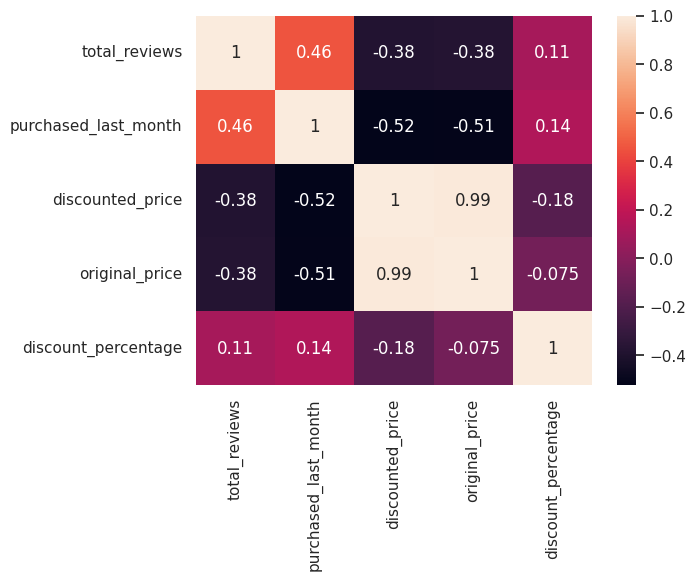

In [49]:
df_products_c_num=df_train.select_dtypes(include="number")
sns.heatmap(df_products_c_num.corr(),annot=True)

Fuerte correlación positiva:

discounted_price y original_price tienen una correlación de 0.99, lo cual es esperado: los precios con descuento dependen directamente del precio original.

Moderada correlación positiva:

total_reviews y purchased_last_month tienen 0.46, lo que indica que los productos con más compras recientes tienden a tener más reseñas.

Moderadas correlaciones negativas:

purchased_last_month vs discounted_price (-0.52) y purchased_last_month vs original_price (-0.51). Esto sugiere que los productos más baratos se compran más frecuentemente.

total_reviews vs discounted_price y total_reviews vs original_price (-0.38) muestra que los productos más caros tienden a tener menos reseñas.

Débil o nula correlación:

discount_percentage prácticamente no se relaciona con ninguna variable importante (valores cercanos a 0).

delivery_date_num tiene correlaciones muy bajas con todo, indicando que la fecha de entrega no afecta fuertemente las compras ni las reseñas

In [50]:
df_train.drop('original_price', axis=1, inplace=True)

\Al estar fuertemenete correlacionados discounted_price y original_price, elimino discounted_price, de otro modo daria problemas de intercolinealidad

#EDA text

In [51]:
!pip install wordcloud matplotlib -q

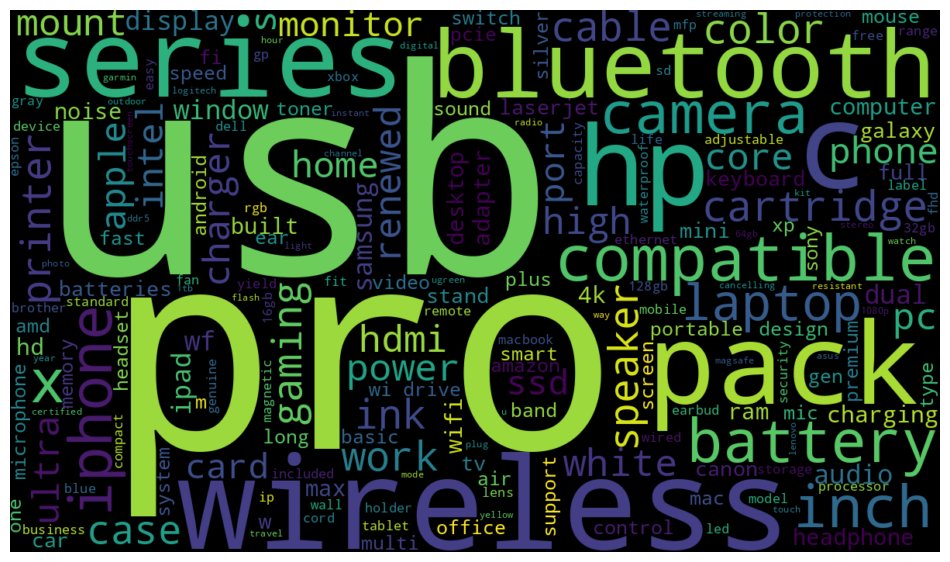

In [52]:
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Unir todos los títulos en una sola cadena
text = " ".join(df_train["product_title"].dropna().astype(str))

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["black"])

wordcloud = WordCloud(
    width=1200,
    height=700,
    background_color="black",
    stopwords=custom_stopwords, # palabras o frases que puede ignorar ej "black"
    collocations=False # evita duplicar combinaciones como “black
).generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [55]:
df_train.drop('product_title', axis=1, inplace=True)

In [111]:
df_train

total_reviews  purchased_last_month  discounted_price is_best_seller  \
0          7.807103              8.699681          2.396986       no badge   
1          8.021256              7.601402          5.752573       no badge   
2          6.685236              9.210440          5.095222    best seller   
3          6.685236              9.210440          4.300545       no badge   
4          6.685236             11.512935          4.614625    best seller   
...             ...                   ...               ...            ...   
5194       5.099866              3.931826          6.309918       no badge   
5195       5.616771              4.615121          4.382600       no badge   
5196       6.685236              8.699681          2.771964       no badge   
5197       7.605392              5.993961          3.331847       no badge   
5198       7.371489              3.931826          6.522093       no badge   

     is_sponsored                has_coupon   product_category  \
0       sponsored                 no coupon            laptops   
1       sponsored                 no coupon            laptops   
2         organic                 no coupon             phones   
3         organic                 no coupon             phones   
4         organic                 no coupon  other electronics   
...           ...                       ...                ...   
5194      organic  save $30.00  with coupon             phones   
5195      organic                 no coupon  other electronics   
5196    sponsored                 no coupon  power & batteries   
5197      organic                 no coupon            laptops   
5198    sponsored                 no coupon            laptops   

      discount_percentage rank_review  
0                3.651178         low  
1                2.400619        high  
2                0.000000        high  
3                0.000000        high  
4                0.000000        high  
...                   ...         ...  
5194             2.250239         mid  
5195             1.035439         mid  
5196             0.000000        high  
5197             0.000000        high  
5198             3.386422         low  

[5199 rows x 9 columns]

## has_coupon

In [56]:
df_train["has_coupon"].unique()

array(['no coupon', 'save $10.00  with coupon', 'save 10%  with coupon',
       'save $0.33  with coupon', 'save $18.00  with coupon',
       'save 5%  with coupon', 'save $2.00  with coupon',
       'save $15.00  with coupon', 'save 6%  with coupon',
       'save 15%  with coupon', 'save $4.00  with coupon',
       'save $1.50  with coupon', 'save 7%  with coupon',
       'save 20%  with coupon', 'save $1.00  with coupon',
       'save $5.00  with coupon', 'save $30.00  with coupon',
       'save $8.00  with coupon', 'save $20.00  with coupon',
       'save $12.00  with coupon', 'save $133.00  with coupon',
       'save $50.00  with coupon', 'save $11.00  with coupon',
       'save 25%  with coupon', 'save 30%  with coupon',
       'save $3.00  with coupon', 'save 40%  with coupon',
       'save $25.00  with coupon', 'save $13.00  with coupon',
       'save 25%  with coupon (some sizes/colors)',
       'save 8%  with coupon', 'save $100.00  with coupon',
       'save $90.00  with coup

In [57]:
import re
import numpy as np

def parse_coupon(x):
    x = str(x).lower()
    if "no coupon" in x:
        return 0, "none"

    # buscar descuento en porcentaje
    match_percent = re.search(r"(\d+)%", x)
    if match_percent:
        return float(match_percent.group(1)), "percent"

    # buscar descuento en dólares
    match_dollar = re.search(r"\$([0-9]+(?:\.[0-9]+)?)", x)
    if match_dollar:
        return float(match_dollar.group(1)), "dollar"
    return np.nan, "unknown"

df_train[["coupon_value", "coupon_type"]] = df_train["has_coupon"].apply(lambda x: pd.Series(parse_coupon(x)))


In [58]:
df_train.tail(10)

total_reviews  purchased_last_month  discounted_price is_best_seller  \
5189       4.905275              4.615121          4.983538       no badge   
5190       7.583756              6.398595          2.163323        ends in   
5191       8.575462              6.216606          2.301585       no badge   
5192       1.609438              3.931826          4.382600       no badge   
5193       8.278428              4.615121          4.163871       no badge   
5194       5.099866              3.931826          6.309918       no badge   
5195       5.616771              4.615121          4.382600       no badge   
5196       6.685236              8.699681          2.771964       no badge   
5197       7.605392              5.993961          3.331847       no badge   
5198       7.371489              3.931826          6.522093       no badge   

     is_sponsored                has_coupon   product_category  \
5189      organic                 no coupon             phones   
5190      organic                 no coupon  other electronics   
5191      organic      save 5%  with coupon            laptops   
5192      organic                 no coupon             phones   
5193      organic                 no coupon             phones   
5194      organic  save $30.00  with coupon             phones   
5195      organic                 no coupon  other electronics   
5196    sponsored                 no coupon  power & batteries   
5197      organic                 no coupon            laptops   
5198    sponsored                 no coupon            laptops   

      discount_percentage rank_review  coupon_value coupon_type  
5189             0.000000         low           0.0        none  
5190             2.796061         low           0.0        none  
5191             0.000000        high           5.0     percent  
5192             1.035439         low           0.0        none  
5193             0.000000         low           0.0        none  
5194             2.250239         mid          30.0      dollar  
5195             1.035439         mid           0.0        none  
5196             0.000000        high           0.0        none  
5197             0.000000        high           0.0        none  
5198             3.386422         low           0.0        none

Eliminamos has_coupon ya que obtubimos su nformacion

In [59]:
df_train.drop('has_coupon', axis=1, inplace=True)

## product_category

In [60]:
df_train["product_category"].unique()

array(['laptops', 'phones', 'other electronics', 'cameras', 'storage',
       'printers & scanners', 'tv & display', 'power & batteries',
       'chargers & cables', 'headphones', 'smart home', 'speakers',
       'networking', 'wearables', 'gaming'], dtype=object)

No hay valores atipicos o dato que deba sacar de esta columna

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199 entries, 0 to 5198
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_reviews         5199 non-null   float64
 1   purchased_last_month  5199 non-null   float64
 2   discounted_price      5199 non-null   float64
 3   is_best_seller        5199 non-null   object 
 4   is_sponsored          5199 non-null   object 
 5   product_category      5199 non-null   object 
 6   discount_percentage   5199 non-null   float64
 7   rank_review           5199 non-null   object 
 8   coupon_value          5199 non-null   float64
 9   coupon_type           5199 non-null   object 
dtypes: float64(5), object(5)
memory usage: 406.3+ KB


Hago una copia de los datos, usremos primero para regresion luego para clasificacion

In [63]:
data_train_resp=df_train.copy()

#Modelo de regresion

In [64]:
numeric_features=df_train.select_dtypes(include='number').drop('purchased_last_month', axis=1).columns
numeric_features

Index(['total_reviews', 'discounted_price', 'discount_percentage',
       'coupon_value'],
      dtype='object')

In [65]:
categorical_features=df_train.select_dtypes(include='object').columns
categorical_features

Index(['is_best_seller', 'is_sponsored', 'product_category', 'rank_review',
       'coupon_type'],
      dtype='object')

In [66]:
# defino mi feature y target
y= df_train['purchased_last_month']
x= df_train.drop('purchased_last_month', axis=1)   # df_products_c['original_price']#.drop(['close',],axis=1)
X=x   #x.values#.reshape(-1,1)

In [67]:
from sklearn.model_selection import GridSearchCV, train_test_split
# train - validacion
# Dividimos en 80% entrenamiento y 20% prueba (puedes ajustar test_size)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
################## test ############
# outlier
float_columns=df_test.select_dtypes(include='number').columns
skew_limit=0.75 #medicion aceptable

for col in float_columns:
    if abs(skew_vals[col]) > skew_limit:
        # Transformar la columna (reshape(-1,1) porque PowerTransformer espera 2D)
        df_test[col] =df_test[col].apply(np.log1p) # pt.fit_transform(df_test[[col]])

#  nulos
# --- Imputación simple para numéricas independientes ---
imputer_simple = SimpleImputer(strategy='median')
df_test[num_simple_cols] = imputer_simple.fit_transform(df_test[num_simple_cols])

# --- Imputación avanzada para numéricas correlacionadas (KNN) ---
imputer_knn = KNNImputer(n_neighbors=5)
df_test[num_corr_cols] = imputer_knn.fit_transform(df_test[num_corr_cols])

# --- Imputación para categóricas (modo) ---
imputer_cat = SimpleImputer(strategy='most_frequent')
df_test[cat_cols] = imputer_cat.fit_transform(df_test[cat_cols])

# temporal

# df_test["delivery_date"] = pd.to_datetime(df_test["delivery_date"])
# df_test["delivery_date_num"] = df_test["delivery_date"].astype("int64")
#
# df_test.drop('delivery_date', axis=1, inplace=True)
# df_test.drop('data_collected_at', axis=1, inplace=True)
#
# #elimino columna correlacionada en train
# df_test.drop('discounted_price', axis=1, inplace=True)

df_test.drop('original_price', axis=1, inplace=True)
df_test.drop('delivery_date', axis=1, inplace=True)
df_test.drop('data_collected_at', axis=1, inplace=True)
df_test.drop('product_title', axis=1, inplace=True)

# has_coupon
df_test[["coupon_value", "coupon_type"]] = df_test["has_coupon"].apply(lambda x: pd.Series(parse_coupon(x)))
df_test.drop('has_coupon', axis=1, inplace=True)

# copia de seguridad
data_test_resp=df_test.copy()

# test
y_test = df_test['purchased_last_month']
X_test = df_test.drop('purchased_last_month', axis=1)

In [69]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_reviews        2474 non-null   float64
 1   discounted_price     2474 non-null   float64
 2   is_best_seller       2474 non-null   object 
 3   is_sponsored         2474 non-null   object 
 4   product_category     2474 non-null   object 
 5   discount_percentage  2474 non-null   float64
 6   rank_review          2474 non-null   object 
 7   coupon_value         2474 non-null   float64
 8   coupon_type          2474 non-null   object 
dtypes: float64(4), object(5)
memory usage: 174.1+ KB


In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4159 entries, 2004 to 860
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_reviews        4159 non-null   float64
 1   discounted_price     4159 non-null   float64
 2   is_best_seller       4159 non-null   object 
 3   is_sponsored         4159 non-null   object 
 4   product_category     4159 non-null   object 
 5   discount_percentage  4159 non-null   float64
 6   rank_review          4159 non-null   object 
 7   coupon_value         4159 non-null   float64
 8   coupon_type          4159 non-null   object 
dtypes: float64(4), object(5)
memory usage: 324.9+ KB


In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,PolynomialFeatures
from sklearn.decomposition import PCA

#preprocesamiento
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('scaler', StandardScaler()),
        #('poly', PolynomialFeatures(degree=3, include_bias=False)),
        ('pca', PCA(n_components=0.95))
    ]), numeric_features),

    ('cat', OneHotEncoder(handle_unknown='ignore')
    , categorical_features)
])

In [72]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

#from sklearn.svm import SVR
#pipeline de los modelos
ridge_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('ridge', Ridge())
])

tree_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('tree', DecisionTreeRegressor())
])

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

#svr_pipeline = Pipeline([
#    ('preprocessor', preprocessor),
#    ('svr', SVR(kernel='rbf', C=10, epsilon=0.1))
#])
gbr_model=GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    )

In [73]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor# captura mejor los patrones no linales mas discretos
#usaremos el metamodelo stacking
stacking_model = StackingRegressor(
    estimators=[
        ('ridge', ridge_pipeline),
        ('tree', tree_pipeline),
        #('svr', svr_pipeline)
    ],
    #final_estimator=RandomForestRegressor(n_estimators=200, random_state=42)#LinearRegression()
    final_estimator=gbr_model
)

In [74]:
#usamos el grid search para que nuestros datos con cual entrenamos no se vea sesgado por los dato que elegimos

param_grid = {
    'ridge__ridge__alpha': [0.1, 1.0, 10],
    'tree__tree__max_depth': [3, 5, 7]
}


In [75]:
grid = GridSearchCV(stacking_model, param_grid, cv=3)
grid

GridSearchCV(cv=3,
             estimator=StackingRegressor(estimators=[('ridge',
                                                      Pipeline(steps=[('preprocess',
                                                                       ColumnTransformer(transformers=[('num',
                                                                                                        Pipeline(steps=[('scaler',
                                                                                                                         StandardScaler()),
                                                                                                                        ('pca',
                                                                                                                         PCA(n_components=0.95))]),
                                                                                                        Index(['total_reviews', 'discounted_price', 'discount_percentage',
       'coupon_value'],
      dtype='object')),
                                                                                                       ('cat',
                                                                                                        OneHotEncoder(handle_unknown='ign...
                                                                                                        OneHotEncoder(handle_unknown='ignore'),
                                                                                                        Index(['is_best_seller', 'is_sponsored', 'product_category', 'rank_review',
       'coupon_type'],
      dtype='object'))])),
                                                                      ('tree',
                                                                       DecisionTreeRegressor())]))],
                                         final_estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                                                   n_estimators=300,
                                                                                   random_state=42)),
             param_grid={'ridge__ridge__alpha': [0.1, 1.0, 10],
                         'tree__tree__max_depth': [3, 5, 7]})

In [76]:
grid.fit(X_train, y_train) # train
print("Mejores parámetros:", grid.best_params_)
print("Mejor score:", grid.best_score_)

Mejores parámetros: {'ridge__ridge__alpha': 10, 'tree__tree__max_depth': 7}
Mejor score: 0.3961766785637983


In [77]:
R2_train=grid.score(X_train,y_train) # train
print("R2_train:", R2_train)

R2_val=grid.score(X_val,y_val) # vaidacion
print("R2_val:", R2_val)

R2_test=grid.score(X_test,y_test) # test
print("R2_test:", R2_test)

R2_train: 0.43902927443842443
R2_val: 0.42775910376063087
R2_test: 0.36967474108984544


In [78]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# train
y_pred_train = grid.best_estimator_.predict(X_train)
print("train")
print("R²:", r2_score(y_train, y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE:",mean_absolute_error(y_train, y_pred_train))

# val
y_pred_val = grid.best_estimator_.predict(X_val)
print("validacion")
print("R²:", r2_score(y_val, y_pred_val))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("MAE:",mean_absolute_error(y_val, y_pred_val))

# test
y_pred_test = grid.best_estimator_.predict(X_test)
print("vtest")
print("R²:", r2_score(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test))) # senciblesi hay outlayers
print("MAE:",mean_absolute_error(y_test, y_pred_test)) # menos sencible  frente a outlayers

train
R²: 0.43902927443842443
RMSE: 1.0099756754308025
MAE: 0.790512677644996
validacion
R²: 0.42775910376063087
RMSE: 1.0598064914402117
MAE: 0.8208879949215497
vtest
R²: 0.36967474108984544
RMSE: 1.068608162031068
MAE: 0.8227111493586196


/tmp/ipython-input-1350145527.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=True, color="r", label="y")
/tmp/ipython-input-1350145527.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=True, color="b", label="y_pred" , ax=ax1)


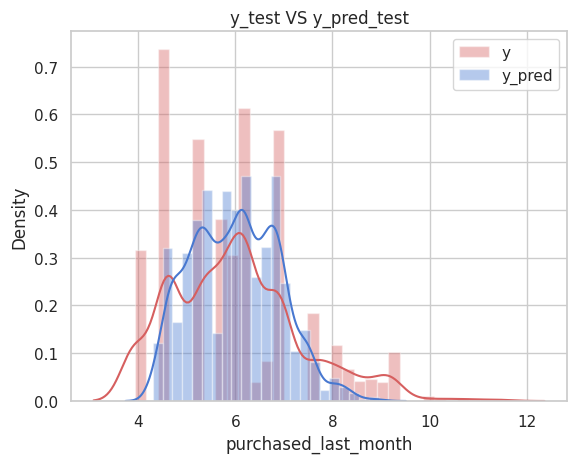

In [80]:
plot_dis(y_test,y_pred_test,"test")

Ambas curvas (roja y azul) están muy cerca, indica que el modelo ha logrado capturar bien la variación

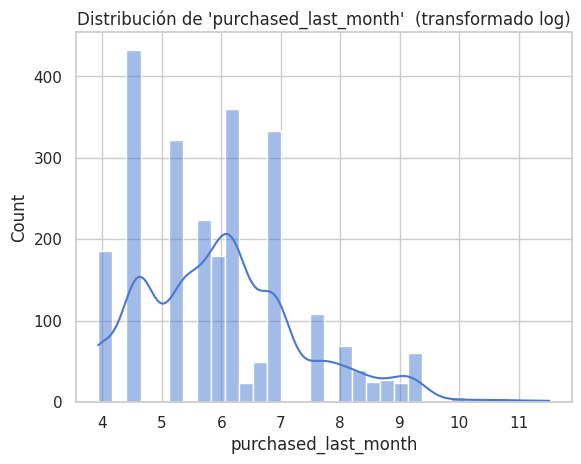

In [82]:
sns.histplot(y_test, kde=True)
plt.title("Distribución de 'purchased_last_month'  (transformado log)")
plt.show()

In [83]:
y_val.max()

11.51293546492023

In [84]:
y_val.min()

3.9318256327243257

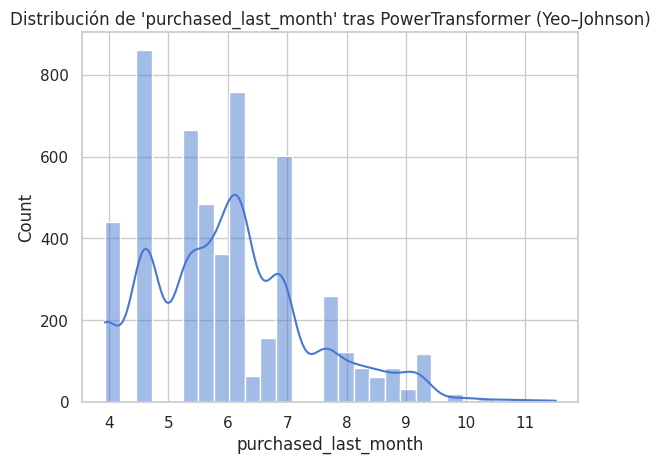

In [85]:
sns.histplot(df_train["purchased_last_month"], kde=True)
plt.title("Distribución de 'purchased_last_month' tras PowerTransformer (Yeo–Johnson)")
plt.show()

In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199 entries, 0 to 5198
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_reviews         5199 non-null   float64
 1   purchased_last_month  5199 non-null   float64
 2   discounted_price      5199 non-null   float64
 3   is_best_seller        5199 non-null   object 
 4   is_sponsored          5199 non-null   object 
 5   product_category      5199 non-null   object 
 6   discount_percentage   5199 non-null   float64
 7   rank_review           5199 non-null   object 
 8   coupon_value          5199 non-null   float64
 9   coupon_type           5199 non-null   object 
dtypes: float64(5), object(5)
memory usage: 406.3+ KB


#EDA Categorico

In [87]:
df_train.describe(include="object")

is_best_seller is_sponsored product_category rank_review coupon_type
count            5199         5199             5199        5199        5199
unique              5            2               15           3           3
top          no badge      organic          laptops        high        none
freq             4951         5108             1168        2349        5105

/tmp/ipython-input-720813695.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  order=pd.value_counts(df_train['rank_review']).index)


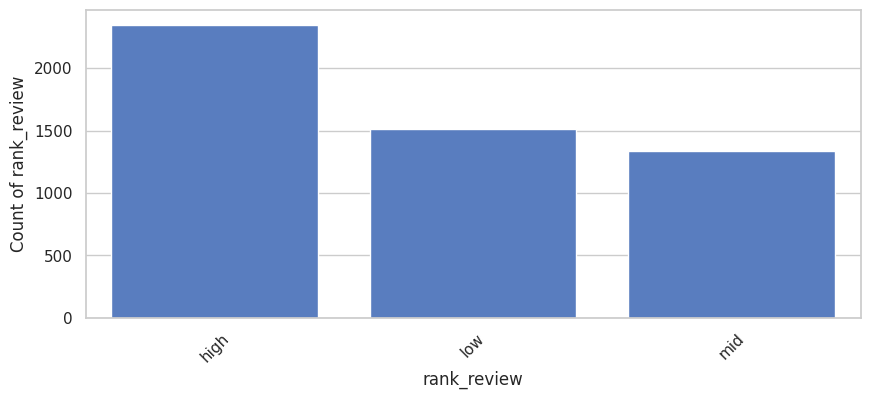

<Figure size 640x480 with 0 Axes>

In [88]:
fig, ax = plt.subplots(figsize = (10,4))
plt1 = sns.countplot(
    x=df_train['rank_review'],
    order=pd.value_counts(df_train['rank_review']).index)

plt1.set(xlabel = 'rank_review', ylabel= 'Count of rank_review')
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

Podemos observar que nuestro target esta desbalanceado

In [89]:
df_train.rank_review.value_counts(normalize=True)

rank_review
high    0.451818
low     0.290825
mid     0.257357
Name: proportion, dtype: float64

Se observa nuestro target esta ligeramente desvalanceado en la clse Mid y Low por lo tanto no hace falta **oversamplear**(con SMOTE) ademas **stratificaremos** para que la proporcion en train test se mantenga en ambas partes

In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199 entries, 0 to 5198
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_reviews         5199 non-null   float64
 1   purchased_last_month  5199 non-null   float64
 2   discounted_price      5199 non-null   float64
 3   is_best_seller        5199 non-null   object 
 4   is_sponsored          5199 non-null   object 
 5   product_category      5199 non-null   object 
 6   discount_percentage   5199 non-null   float64
 7   rank_review           5199 non-null   object 
 8   coupon_value          5199 non-null   float64
 9   coupon_type           5199 non-null   object 
dtypes: float64(5), object(5)
memory usage: 406.3+ KB


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


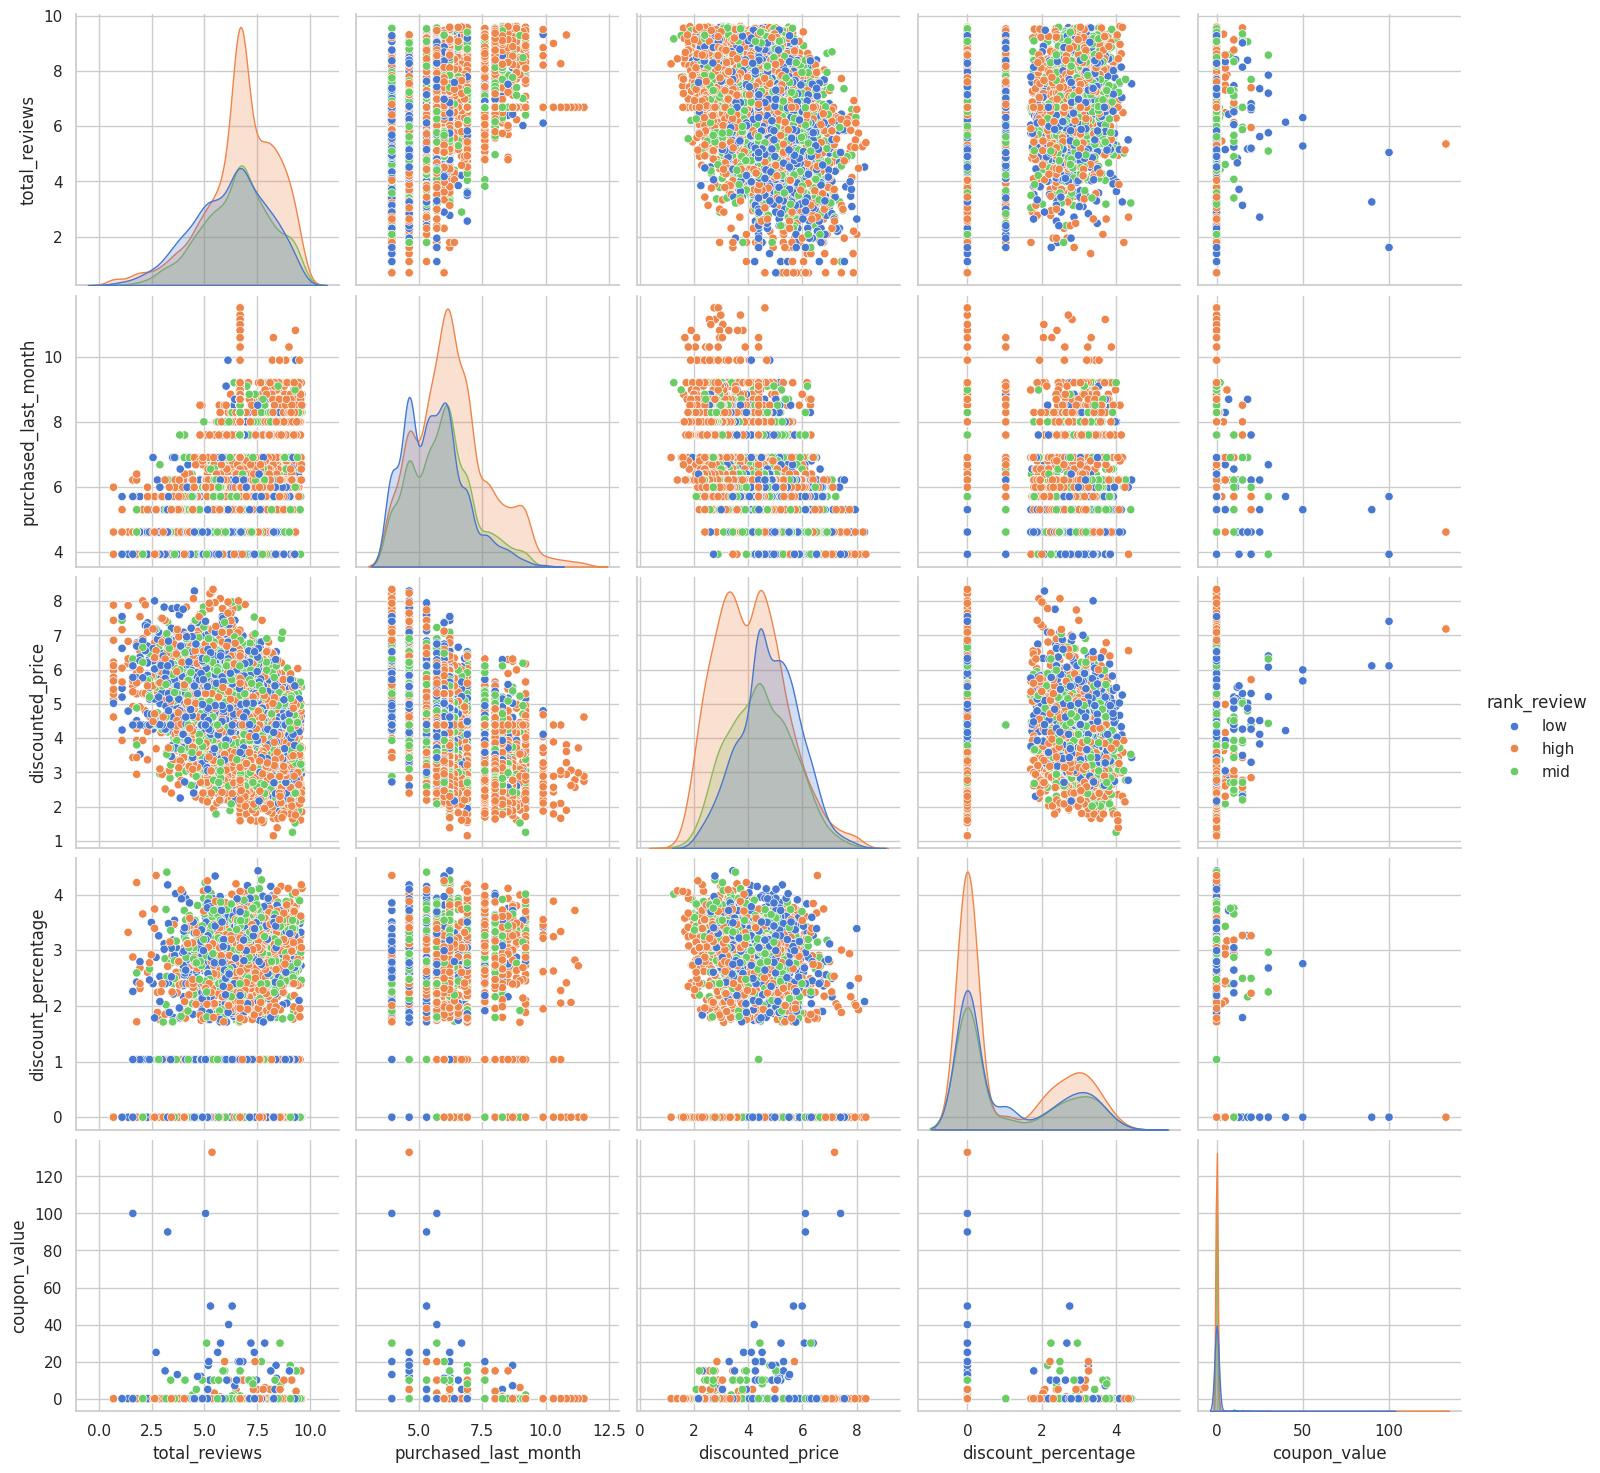

In [92]:
sns.pairplot(df_train, hue='rank_review',size=3)

Las categorías low, mid y high se mezclan mucho en la mayoría de las variables, pero algunas tendencias visibles:

high tiende a concentrarse más en productos con precios medios y más reseñas.

low se ve más distribuido en precios bajos y altos, menos consistente en cantidad de reviews.

Las diferencias no parecen dramáticas, lo que indica que rank_review podría no estar fuertemente relacionada con todas las variables, pero puede tener señales sutiles.

Visualización de distribuciones

Los histogramas/KDE en diagonal muestran que la mayoría de los datos está centrada en rangos específicos, con algunas colas largas (outliers).

Esto puede indicar que transformaciones logarítmicas o normalización podrían ayudar en modelos lineales.

Estadísticas

Chi-cuadrado de independencia
* Si p < 0.05, hay dependencia entre la variable categórica y el target.

In [93]:
df_train.select_dtypes(include="object")

is_best_seller is_sponsored   product_category rank_review coupon_type
0          no badge    sponsored            laptops         low        none
1          no badge    sponsored            laptops        high        none
2       best seller      organic             phones        high        none
3          no badge      organic             phones        high        none
4       best seller      organic  other electronics        high        none
...             ...          ...                ...         ...         ...
5194       no badge      organic             phones         mid      dollar
5195       no badge      organic  other electronics         mid        none
5196       no badge    sponsored  power & batteries        high        none
5197       no badge      organic            laptops        high        none
5198       no badge    sponsored            laptops         low        none

[5199 rows x 5 columns]

In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199 entries, 0 to 5198
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_reviews         5199 non-null   float64
 1   purchased_last_month  5199 non-null   float64
 2   discounted_price      5199 non-null   float64
 3   is_best_seller        5199 non-null   object 
 4   is_sponsored          5199 non-null   object 
 5   product_category      5199 non-null   object 
 6   discount_percentage   5199 non-null   float64
 7   rank_review           5199 non-null   object 
 8   coupon_value          5199 non-null   float64
 9   coupon_type           5199 non-null   object 
dtypes: float64(5), object(5)
memory usage: 406.3+ KB


p < 0.05-> la variable está significativamente asociada con rank_review

In [95]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway, kruskal
#categorical_cols = ['is_best_seller', 'is_sponsored', 'has_coupon', 'product_category']
target = 'rank_review'  # tu variable objetivo
results = []

cols=df_train.columns#.select_dtypes(include="object").columns
for col in cols:#df_train.columns:

    if df_train[col].dtype == 'object':  # 🧩 Variable categórica
        # Crosstab: categórica vs categórica
        tabla = pd.crosstab(df_train[col], df_train[target])
        if tabla.shape[0] > 1 and tabla.shape[1] > 1:
            chi2, p, dof, expected = chi2_contingency(tabla)
            results.append({
                'variable': col,
                'tipo': 'categórica',
                'test': 'Chi²',
                'p_value': p
            })
    else:  # Variable numérica
        # ANOVA o Kruskal para numérica vs categórica
        grupos = [df_train[df_train[target] == cat][col].dropna() for cat in df_train[target].unique()]
        try:
            # primero probamos ANOVA (si hay suficientes datos)
            f_stat, p = f_oneway(*grupos)
            test = 'ANOVA'
        except:
            # si falla (por ejemplo, datos no normales), usamos Kruskal-Wallis
            h_stat, p = kruskal(*grupos)
            test = 'Kruskal–Wallis'

        results.append({
            'variable': col,
            'tipo': 'numérica',
            'test': test,
            'p_value': p
        })

# Crear DataFrame ordenado por significancia
resultados_df = pd.DataFrame(results).sort_values('p_value')
print(resultados_df)


               variable        tipo   test       p_value
7           rank_review  categórica   Chi²  0.000000e+00
5      product_category  categórica   Chi²  6.507226e-79
2      discounted_price    numérica  ANOVA  1.239148e-66
1  purchased_last_month    numérica  ANOVA  5.334691e-65
0         total_reviews    numérica  ANOVA  1.759731e-19
9           coupon_type  categórica   Chi²  1.193069e-04
8          coupon_value    numérica  ANOVA  2.428226e-04
3        is_best_seller  categórica   Chi²  5.460536e-03
4          is_sponsored  categórica   Chi²  1.410800e-02
6   discount_percentage    numérica  ANOVA  2.058488e-01


Si p < 0.05, hay evidencia significativa de que la variable está relacionada con el target.
* osea la tabla me sugiere que todos estan relacionada con rank_review exexpo discount_percentege

In [96]:
df_train.head(4)

total_reviews  purchased_last_month  discounted_price is_best_seller  \
0       7.807103              8.699681          2.396986       no badge   
1       8.021256              7.601402          5.752573       no badge   
2       6.685236              9.210440          5.095222    best seller   
3       6.685236              9.210440          4.300545       no badge   

  is_sponsored product_category  discount_percentage rank_review  \
0    sponsored          laptops             3.651178         low   
1    sponsored          laptops             2.400619        high   
2      organic           phones             0.000000        high   
3      organic           phones             0.000000        high   

   coupon_value coupon_type  
0           0.0        none  
1           0.0        none  
2           0.0        none  
3           0.0        none

In [97]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

encoder = OrdinalEncoder(categories=[["low", "mid", "high"]])  # orden definido
y = np.array(df_train["rank_review"]).reshape(-1, 1)
y_encoded = encoder.fit_transform(y)

Y_cat=pd.DataFrame(y_encoded.ravel(),columns=["rank_review_encoded"],dtype="int64")
Y_cat

rank_review_encoded
0                       0
1                       2
2                       2
3                       2
4                       2
...                   ...
5194                    1
5195                    1
5196                    2
5197                    2
5198                    0

[5199 rows x 1 columns]

No usamos one_hot_encodind ya que vimos que nuestros datos son ordinales(tienen orden)

# Modelo de clasificacion

In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199 entries, 0 to 5198
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_reviews         5199 non-null   float64
 1   purchased_last_month  5199 non-null   float64
 2   discounted_price      5199 non-null   float64
 3   is_best_seller        5199 non-null   object 
 4   is_sponsored          5199 non-null   object 
 5   product_category      5199 non-null   object 
 6   discount_percentage   5199 non-null   float64
 7   rank_review           5199 non-null   object 
 8   coupon_value          5199 non-null   float64
 9   coupon_type           5199 non-null   object 
dtypes: float64(5), object(5)
memory usage: 406.3+ KB


In [101]:
numeric_features=df_train.select_dtypes(include='number').columns
numeric_features

Index(['total_reviews', 'purchased_last_month', 'discounted_price',
       'discount_percentage', 'coupon_value'],
      dtype='object')

In [102]:
categorical_features=df_train.select_dtypes(include='object').drop('rank_review', axis=1).columns
categorical_features

Index(['is_best_seller', 'is_sponsored', 'product_category', 'coupon_type'], dtype='object')

In [103]:
# defino mi feature y target
y= Y_cat
x= df_train.drop('rank_review', axis=1)   # df_products_c['original_price']#.drop(['close',],axis=1)
X=x   #x.values#.reshape(-1,1)

In [104]:
# also set a random state
rs = 123
# First, let's split the training and testing dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)#stratify medivide proporciionalmmente el target

array([[<Axes: title={'center': 'rank_review_encoded'}>]], dtype=object)

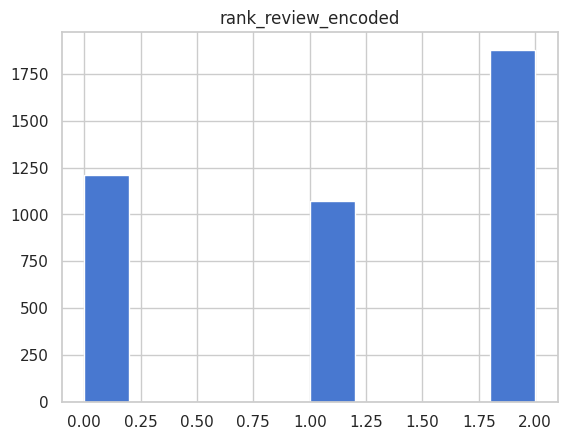

In [105]:
y_train.hist()

<Axes: >

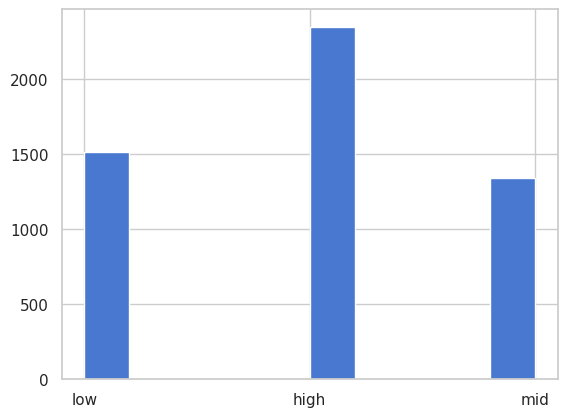

In [106]:
df_train["rank_review"].hist()

puede considerarse como no desbalanceado

In [107]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

from imblearn.pipeline import Pipeline
#from sklearn.pipeline import Pipeline

from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import StackingClassifier

from imblearn.over_sampling import SMOTE
# Preprocesador
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95))
    ]), numeric_features),

    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# modelos
ridge_pipeline = Pipeline([
    ('preprocess', preprocessor),     # ColumnTransformer
    ('smote', SMOTE(random_state=42)),# Oversampler solo se usara cuando se hace fitt
    ('ridge', RidgeClassifier())      # Modelo final
])

tree_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),# Oversampler solo se usara cuando se hace fitt
    ('tree', DecisionTreeClassifier())
])
# metamodelo
gbr_model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

stacking_model = StackingClassifier(
    estimators=[
        ('ridge', ridge_pipeline),
        ('tree', tree_pipeline),
    ],
    final_estimator=gbr_model  # también puedes probar xgb_model
)

In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'ridge__ridge__alpha': [0.1, 1.0, 10],
    'tree__tree__max_depth': [3, 5, 7]
}

grid = GridSearchCV(
    stacking_model,
    param_grid,
    cv=5,
    scoring='accuracy',  # o f1, roc_auc, recall, etc. según tu problema
    n_jobs=-1
)


In [109]:
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor score (accuracy):", grid.best_score_)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Mejores parámetros: {'ridge__ridge__alpha': 10, 'tree__tree__max_depth': 3}
Mejor score (accuracy): 0.5087750509117838


In [110]:
grid.score(X_train, y_train)

0.5224813657129117

In [111]:
grid_bestmodel = grid.best_estimator_

In [112]:
grid

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('ridge',
                                                       Pipeline(steps=[('preprocess',
                                                                        ColumnTransformer(transformers=[('num',
                                                                                                         Pipeline(steps=[('scaler',
                                                                                                                          StandardScaler()),
                                                                                                                         ('pca',
                                                                                                                          PCA(n_components=0.95))]),
                                                                                                         Index(['total_reviews', 'purchased_last_month', 'discounted_price',
       'discount_percentage', 'coupon_value'],
      dtype='object')),
                                                                                                        ('cat',
                                                                                                         OneHotEnc...
                                                                                                         Index(['is_best_seller', 'is_sponsored', 'product_category', 'coupon_type'], dtype='object'))])),
                                                                       ('smote',
                                                                        SMOTE(random_state=42)),
                                                                       ('tree',
                                                                        DecisionTreeClassifier())]))],
                                          final_estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                                                     n_estimators=300,
                                                                                     random_state=42)),
             n_jobs=-1,
             param_grid={'ridge__ridge__alpha': [0.1, 1.0, 10],
                         'tree__tree__max_depth': [3, 5, 7]},
             scoring='accuracy')

In [ ]:
# L2 penalty to shrink coefficients without removing any features from the model
#penalty= 'l2'
## Our classification problem is multinomial
#multi_class = 'multinomial'
## Use lbfgs for L2 penalty and multinomial classes
#solver = 'lbfgs'
## Max iteration = 1000
#max_iter = 1000
#
#from sklearn.linear_model import LogisticRegression
## Define a logistic regression model with above arguments
#l2_model = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

In [ ]:
#l2_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=123)

In [ ]:
#l2_model.score(X_train, y_train)

0.4717480163500842

In [114]:
grid_pred_train = grid.predict(X_train)
grid_pred_val = grid.predict(X_val)
#grid_pred_test = grid.predict(X_test)

In [115]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [116]:
evaluate_metrics(y_val, grid_pred_val)

{'accuracy': 0.5163461538461539,
 'recall': array([0.53642384, 0.05970149, 0.76382979]),
 'precision': array([0.43902439, 0.36363636, 0.57256778]),
 'f1score': array([0.4828614 , 0.1025641 , 0.65451231])}

In [117]:
cf_train = confusion_matrix(y_train, grid_pred_train, normalize='true')
cf_val = confusion_matrix(y_val, grid_pred_val, normalize='true')
#cf_test = confusion_matrix(y_val, grid_preds, normalize='true')

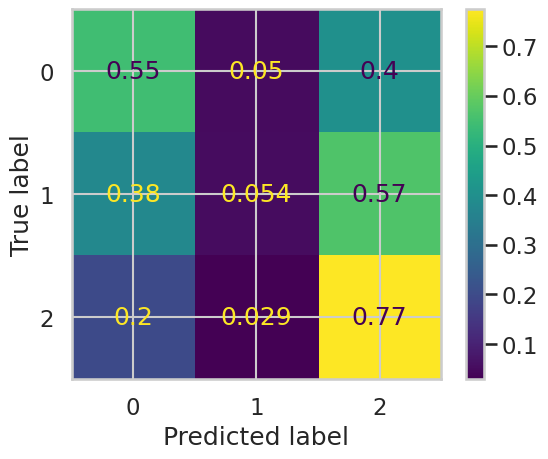

In [118]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf_train)
disp.plot()
plt.show()

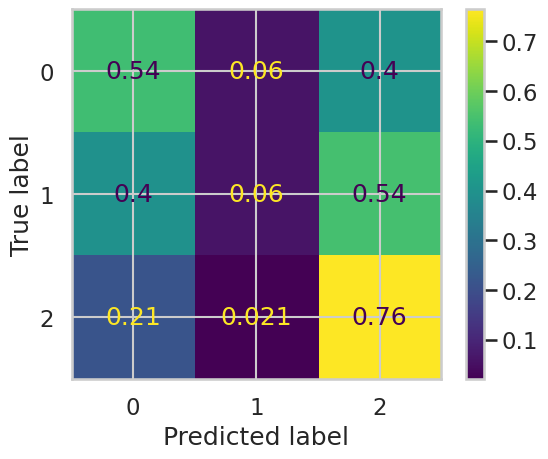

In [119]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf_val)
disp.plot()
plt.show()

Calcular la curva ROC y el AUC

AUC macro promedio: 0.649


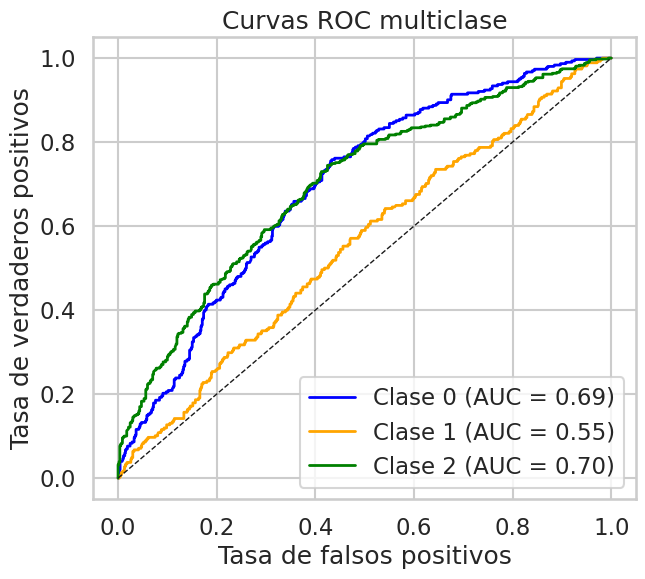

In [121]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarizamos las etiquetas verdaderas (y_val) para el caso multiclase
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])  # ajusta las clases según las tuyas

# Obtenemos las probabilidades de cada clase
y_pred_val = grid.best_estimator_.predict_proba(X_val)
# Calculamos el AUC general (promedio macro)
roc_auc_macro = roc_auc_score(y_val_bin, y_pred_val, average='macro', multi_class='ovr')
print(f"AUC macro promedio: {roc_auc_macro:.3f}")

# Calcular las curvas ROC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(grid.best_estimator_.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred_val[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
plt.figure(figsize=(7, 6))
colors = ['blue', 'orange', 'green']
for i, color in zip(range(len(grid.best_estimator_.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curvas ROC multiclase')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [122]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

#AUC = 1.0 → el modelo distingue perfectamente las clases
#AUC = 0.5 -> el modelo no tiene capacidad de discriminación
def multiclass_roc_auc_score(y_test, y_pred, average= 'macro'):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

print('El AUC-ROC multiclase train:',multiclass_roc_auc_score(y_train, grid_pred_train))
print('El AUC-ROC multiclase: val',multiclass_roc_auc_score(y_val, grid_pred_val))
#print('El AUC-ROC multiclase test:',multiclass_roc_auc_score(y_val, grid_pred_val))

El AUC-ROC multiclase train: 0.5988654166723748
El AUC-ROC multiclase: val 0.5955037412174341


Sin oversamplear
* El modelo tiene una capacidad de discriminación baja tanto en entrenamiento como en validación
* La diferencia entre train (0.599) y val (0.576) es pequeña, lo que sugiere que el modelo no está **sobreajustado**
Co oversampling


AUC-PR promedio (macro): 0.470


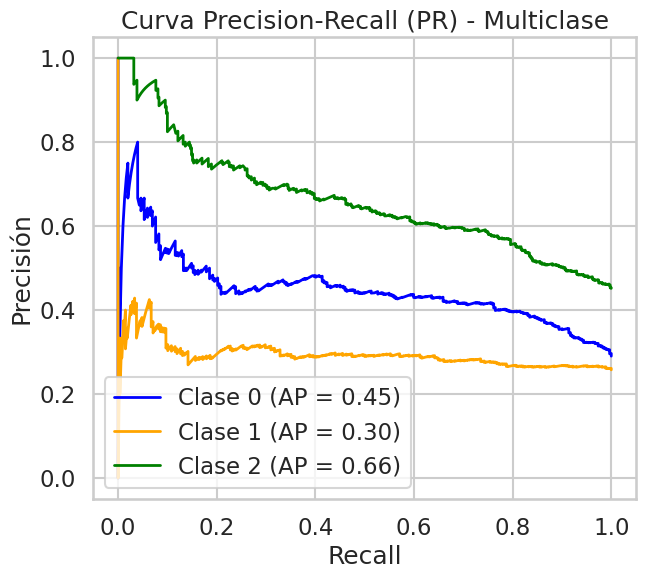

In [123]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
# Binarizamos las etiquetas verdaderas
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])  # Ajusta según tus clases

# Obtenemos las probabilidades del modelo
y_pred_val = grid.best_estimator_.predict_proba(X_val)

# Calculamos la precisión, recall y AUC (Average Precision) para cada clase
precision = {}
recall = {}
average_precision = {}

for i in range(len(grid.best_estimator_.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_val_bin[:, i], y_pred_val[:, i])
    average_precision[i] = average_precision_score(y_val_bin[:, i], y_pred_val[:, i])

# Calculamos el promedio (macro)
average_precision["macro"] = average_precision_score(
    y_val_bin, y_pred_val, average="macro"
)
print(f"AUC-PR promedio (macro): {average_precision['macro']:.3f}")

# Graficar
plt.figure(figsize=(7, 6))
colors = ['blue', 'orange', 'green']
for i, color in zip(range(len(grid.best_estimator_.classes_)), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Clase {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva Precision-Recall (PR) - Multiclase')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [125]:
from sklearn.metrics import f1_score

f1_score(y_val, grid_pred_val, average='macro')

0.4133126032493906

In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_val, grid_pred_val))

              precision    recall  f1-score   support

           0       0.44      0.54      0.48       302
           1       0.36      0.06      0.10       268
           2       0.57      0.76      0.65       470

    accuracy                           0.52      1040
   macro avg       0.46      0.45      0.41      1040
weighted avg       0.48      0.52      0.46      1040



# Storyrelling

[[1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


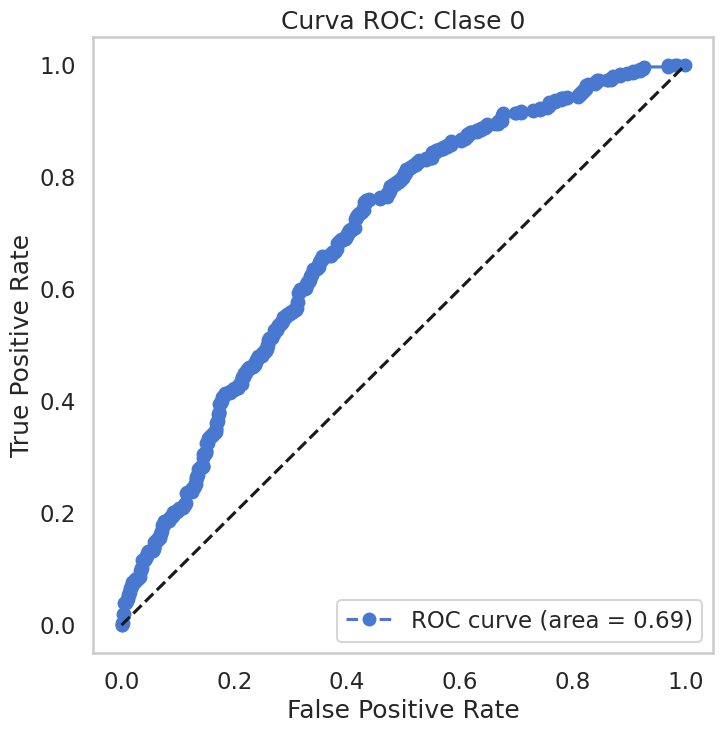

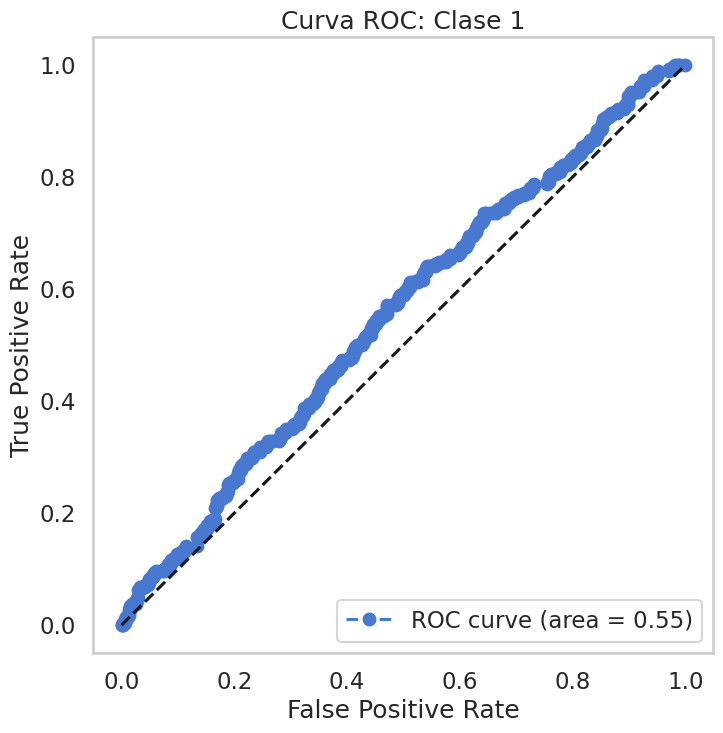

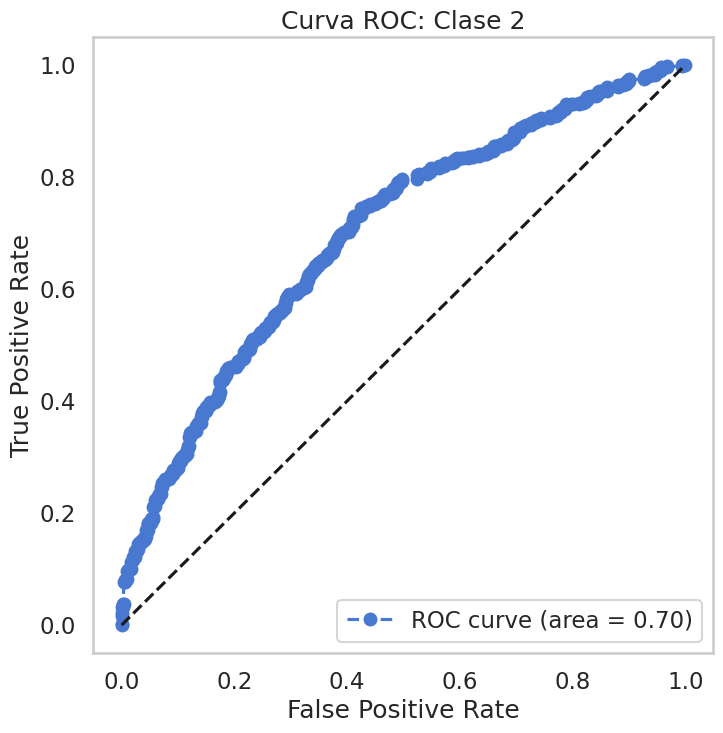

In [127]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_val = label_binarize(y_val, classes=[0, 1, 2])
n_classes = y_val.shape[1]
print(y_val[:5])

y_score = grid.best_estimator_.predict_proba(X_val)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


for i in range(n_classes):
    plt.figure(figsize=(8,8))
    plt.plot(fpr[i], tpr[i],'o--', label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC: Clase ' + str(i))
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()